In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/OUTLIERS_REMOVE/Data/Solid_Waste_Generation___Recycling.csv')

In [31]:
data.head()

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.0,2515427.0,6577102.3,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.0,2838771.0,6257801.0,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.0,2724337.0,6084275.0,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.0,2666863.0,6122052.0,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.0,4153915.0,6526087.0,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241


# DETECTING THE OUTLIERS
- There are 3 major ways to detect the outliers.
   * Sorting the data
   * Drawing graphs/plots
   * Inter Quartile Range (IQR) method

# Sorting the Data
- The outliers contains values that are very high or very low.This is the reason they are called abnormal values.
- When we sort the data into ascending order,we can have data startting from low to high values.
- If the outliers are very low values,then they can seen in the begining of the sorted data.
- If the outliers are very high values,then they can be seen at the end of the sorted data.This clue can help us to sense the outliers.

- Suppose,we want to find the outliers in the column name 'Aluminium Cans'.We have to first sort the dataset on that column.

In [32]:
df = data.sort_values('Aluminum Cans')

In [33]:
df['Aluminum Cans'].head()

1     12540
2     12718
8     12842
11    13115
12    13635
Name: Aluminum Cans, dtype: int64

In [34]:
df['Aluminum Cans'].tail()

4     16010
13    16679
3     17608
0     17944
9     21098
Name: Aluminum Cans, dtype: int64

# Drawing Graphs/ Plots
- 1. Boxplot - the outliers can be shown either above or below the box.
- 2. Histogram - the outliers are displayed as bars far away from other bars.
- 3. Scatterplot - the outliers will be seen as datapoints away from the group of other points.

<Axes: xlabel='Aluminum Cans'>

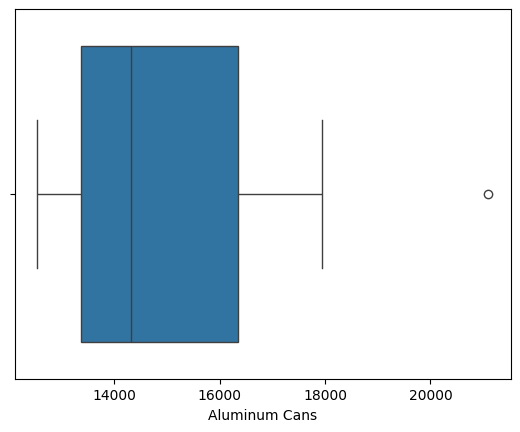

In [35]:
sns.boxplot(data=data,x='Aluminum Cans')

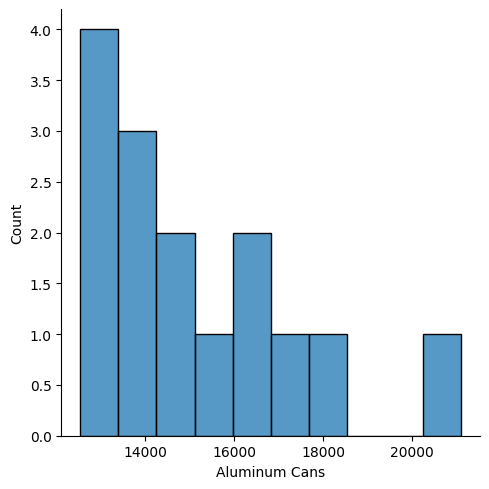

In [36]:
sns.displot(data=data,kind='hist',x='Aluminum Cans',bins=10)

# Inter Quartile Range (IQR) Method
- IQR reprsent the range of values between 75th and 25th percentiles.We can divide the total data into 4 parts or 4 quartiles as:
    * 25th pertcentile(Q1)
    * 50th percentile(Q2)(or Median)
    * 75th percentile(Q3)
    * 100th percentile(Q4)
- IQR = Q3 - Q1 

In [37]:
q3 = data['Aluminum Cans'].quantile(0.75)
q3

16344.5

In [38]:
q1 = data['Aluminum Cans'].quantile(0.25)
q1

13375.0

In [39]:
iqr = q3 - q1
print("IQR:",iqr)

IQR: 2969.5


- This iqr value helps us to find the valid upper and lower limits in the dataset.
- the valid upper limit is q3 + (1.5 * iqr)
- the valid lower limit is q1 - (1.5 * iqr)

In [40]:
ul = q3 + (1.5 * iqr)
print("Upper Limit:",ul)

Upper Limit: 20798.75


In [41]:
ll = q1 - (1.5 * iqr)
print("Lower Limit:",ll)

Lower Limit: 8920.75


- Using the above formula,we can calculate the upper and lower limits.Any values above the upper limit or below the lower limit are condider as outliers.

In [42]:
print(ul,ll)

20798.75 8920.75


- So,Any values above 20798 will become outliers and any values below 8920 will also become outliers.

# How to Handle Outliers

- When we found outliers in the dataset,we have to either delete or replace them with some resonable value.
- When the dataset contains huge number of rows,it is better to delete the outliers.
- When the dataset contains less number of rows,deleting the outliers will effect the result as the number of available rows after deletion will become still lesser.

#### How to delete the outliers from the dataset [When Large Dataset]
- We have to delete the rows with value above ul and below ll.This can be done using numpy's where() function that returns an array of indexes.

To find the upper bound values that are above ul ,we can write:

In [43]:
upper = np.where(data['Aluminum Cans'] >= ul)
upper

(array([9]),)

To find the lower bound values that are below ll ,we can write:

In [44]:
lower = np.where(data['Aluminum Cans'] <= ul)
lower

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14]),)

In [45]:
# delete the rows
# data.drop(upper[0],inplace=True)
# data.drop(lower[0],inplace=True)

#### How to impute the value in outliers [When Small Dataset]

- In some cases,especially when there are less number of rows ,it is not good idea to remove the rows.
- In such cases,it is better to replace the outliers with resonable values.
- Generally,the outliers are replace by the mean or median value of the other values in the column.We know that the numpy module has function mean() and median() to calculate mean and median values.

- First of all,we will convert the 'Aluminum Cans' values into an array using .values attribute as

In [46]:
arr = data['Aluminum Cans'].values

- All these values of 'arr' should be between the lower and upper limits.Such values are marked as True.Remaining values are marked as False (They are outliers) 

In [47]:
# Above & is used since it is in the middled of boolean values
true_index = (ll < arr ) & (arr < ul) 
true_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

- We can observe that there is one False value in the array 9th position that is the outlier.
- To replace this row with median value.let us find median value of all True values,as:

In [49]:
mid = np.median(data['Aluminum Cans'][true_index])
mid

14157.0

- We know that outliers are represented by False.To replace the outliers with median value,we have to replace the false_index values with median value.

In [50]:
# ~ is bool operator for inverse
false_index = ~true_index
data['Aluminum Cans'].values[false_index] = mid
data 

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.00,2515427.00,6.577102e+06,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.00,2838771.00,6.257801e+06,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.00,2724337.00,6.084275e+06,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.00,2666863.00,6.122052e+06,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.00,4153915.00,6.526087e+06,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241
5,2005,0,15441,8767,47302,14588,1783418,28903,565698,186,...,2736151.00,5355491.00,7.696424e+06,10432575,14758169,17494320,47.85,6256400,15.321797,6.184786
6,2006,0,14951,7507,49796,4008,2295278,25414,570802,897,...,1689840.00,4164837.00,7.760714e+06,9450554,15442903,17132743,49.75,6375600,14.724582,6.602388
7,2007,0,14005,7055,44667,2521,2089972,25734,555757,1193,...,1810580.00,4557764.00,8.082291e+06,9892871,15372234,17182814,47.42,6488000,14.511776,6.156734
8,2008,31800,12842,6586,43401,0,1510051,25219,569688,3297,...,1634267.82,4154879.40,7.516909e+06,9151177,14309506,15943774,47.47,6587600,13.261756,5.649965
9,2009,45431,14157,5194,39777,344,2186429,21493,491266,3317,...,1550645.32,3039032.92,6.126660e+06,7677305,13564327,15114972,54.83,6668200,12.420408,6.111746


# Outliers should be handled after performing EDA on Data

In [6]:
data.head()

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.0,2515427.0,6577102.3,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.0,2838771.0,6257801.0,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.0,2724337.0,6084275.0,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.0,2666863.0,6122052.0,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.0,4153915.0,6526087.0,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241


In [7]:
df = data.copy()

In [8]:
df.head()

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.0,2515427.0,6577102.3,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.0,2838771.0,6257801.0,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.0,2724337.0,6084275.0,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.0,2666863.0,6122052.0,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.0,4153915.0,6526087.0,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241


In [9]:
num = []
cat = []
for i in df.columns:
    if df[i].dtypes != 'object':
        num.append(i)
    else:
        cat.append(i)

In [12]:
num

['Year',
 'Agricultural Organics',
 'Aluminum Cans',
 'Anti-freeze',
 'Appliances/White Goods',
 'Ash, Sand & Dust used in Asphalt Production',
 'Asphalt/Concrete',
 'Batteries - Auto Lead Acid',
 'Cardboard',
 'Carpet & Pad',
 'Cartons',
 'Construction & Demolition Debris',
 'Container Glass',
 'Container Glass (used as aggregate)',
 'Electronics',
 'Fats and Oils',
 'Ferrous Metals',
 'Fluorescent light bulbs',
 'Food (recovered)',
 'Food Processing Waste (pre-consumer)',
 'Food Scraps (post-consumer)',
 'Gypsum',
 'HDPE Plastics',
 'High Grade Paper',
 'Household Batteries',
 'Industrial Batteries',
 'Industrial Organics',
 'Industrial Paper',
 'Landclearing Debris',
 'Landclearing Debris for ER',
 'LDPE Plastics',
 'Mattresses',
 'Miscellaneous',
 'Mixed Paper',
 'Mixed Plastics',
 'Newspaper',
 'Nonferrous Metals',
 'Oil Filters',
 'Other Fuels (Reuse & ER)',
 'Other Organics',
 'Other Recyclable Plastics',
 'Paint',
 'PET Plastic Bottles',
 'Photographic Films',
 'Post-Industrial

In [11]:
len(num)

80

# Check the Outliers in use of boxplot

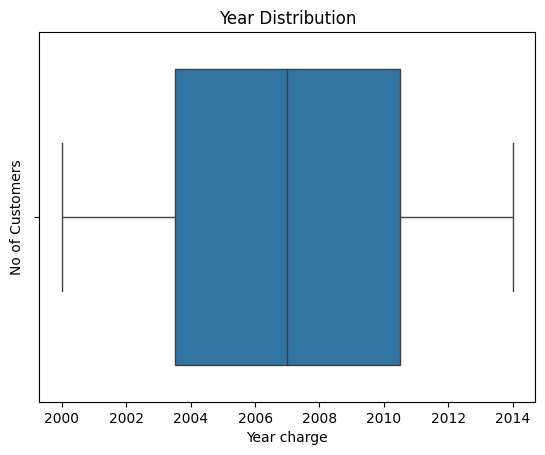

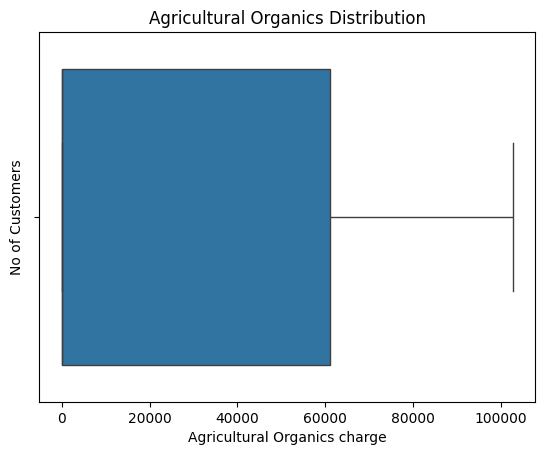

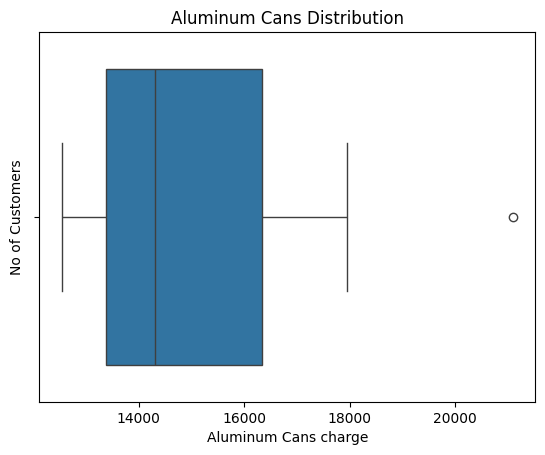

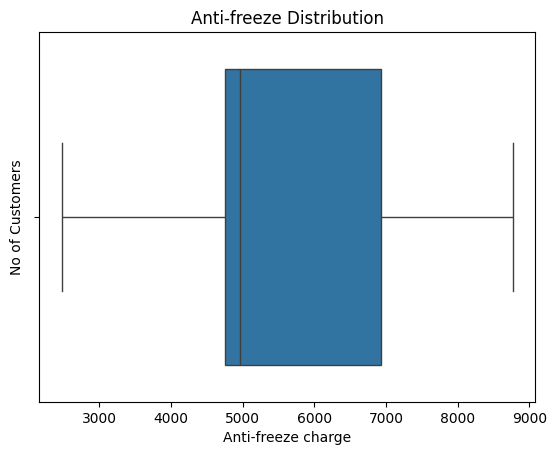

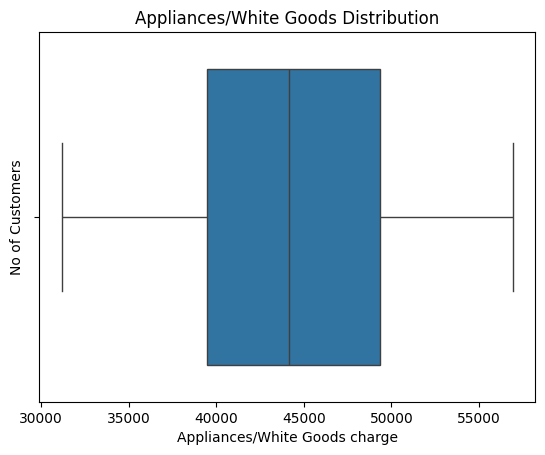

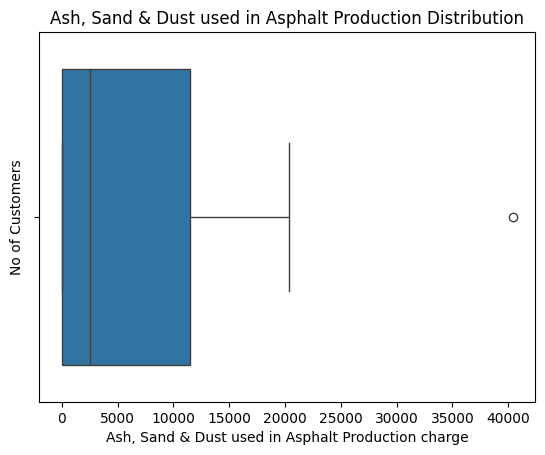

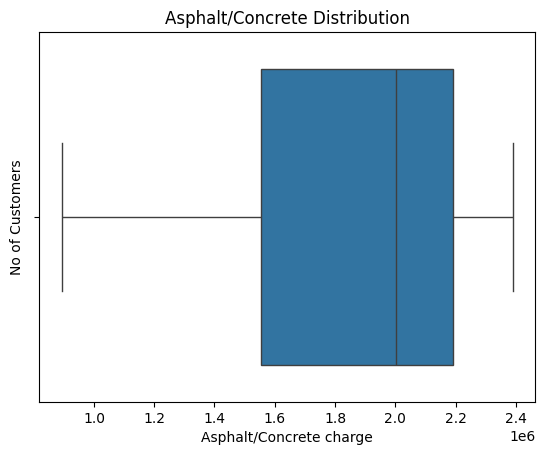

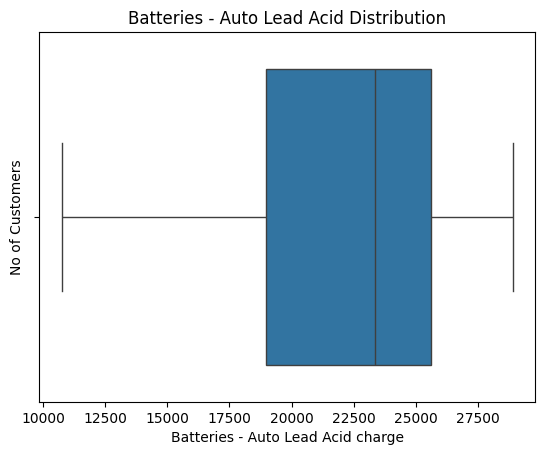

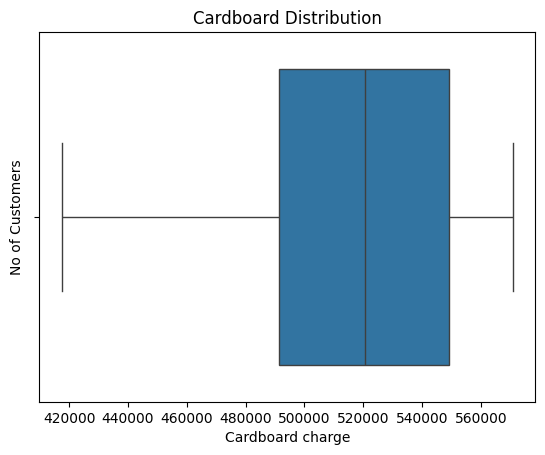

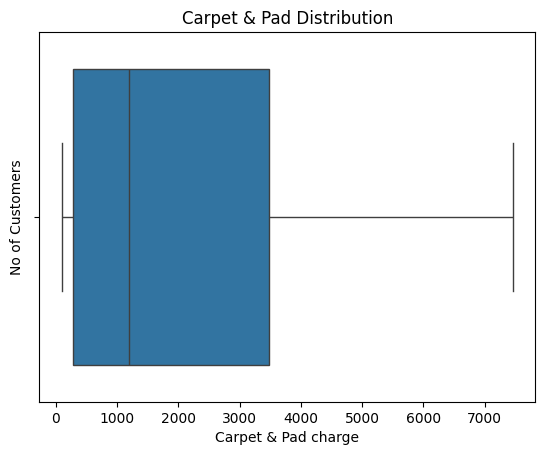

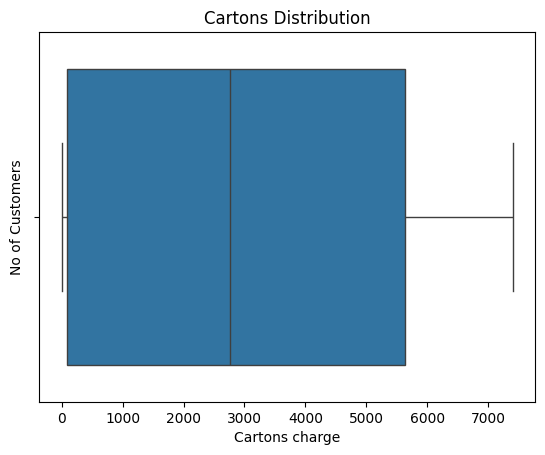

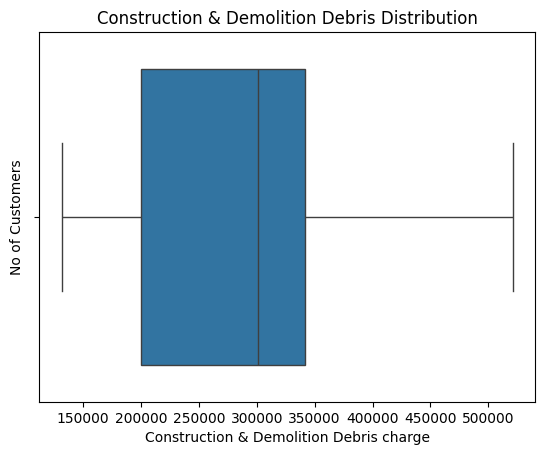

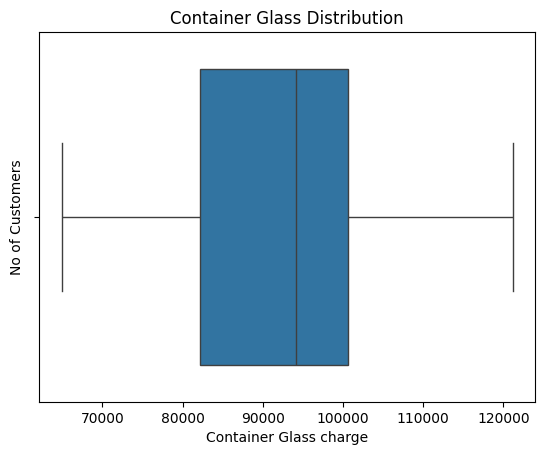

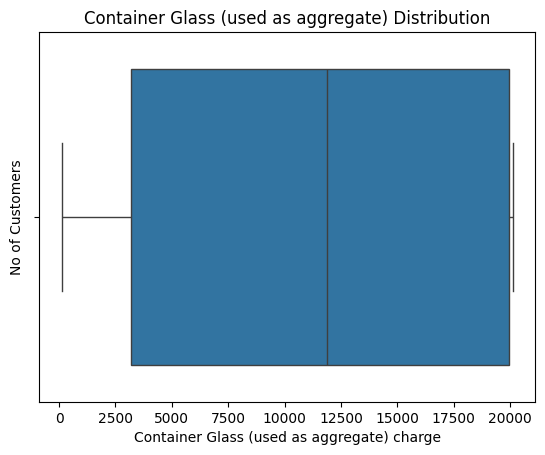

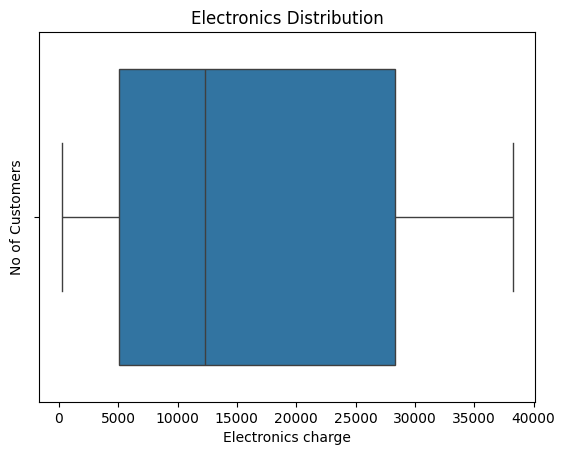

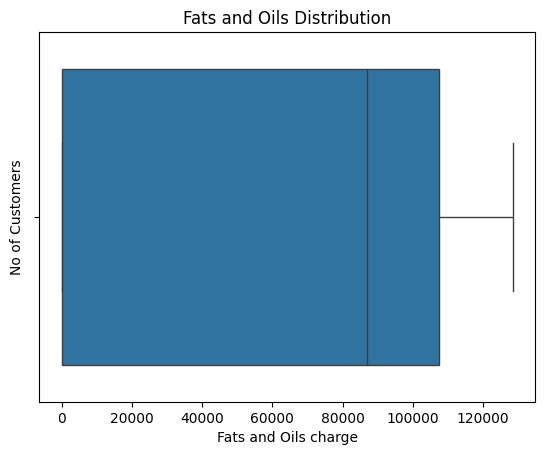

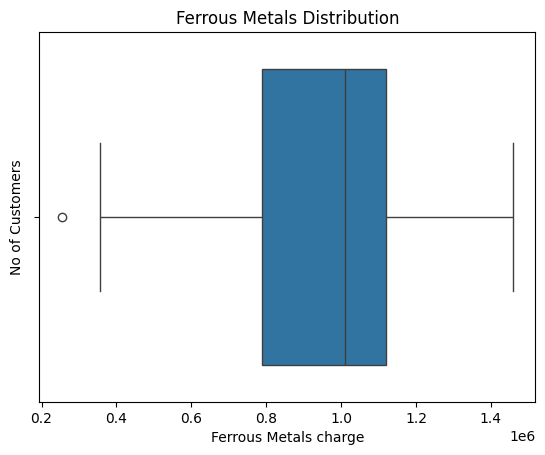

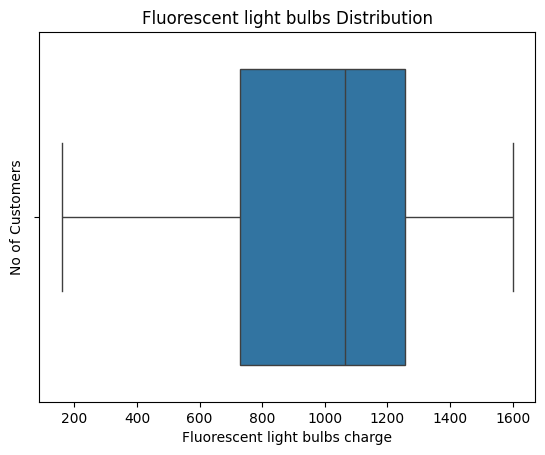

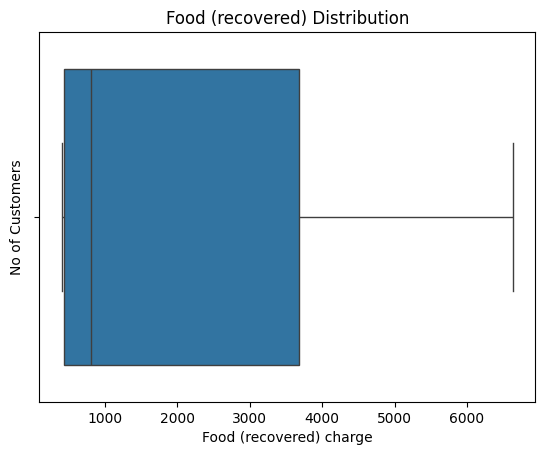

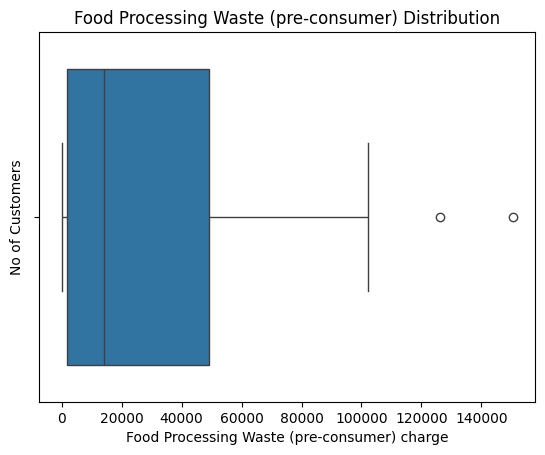

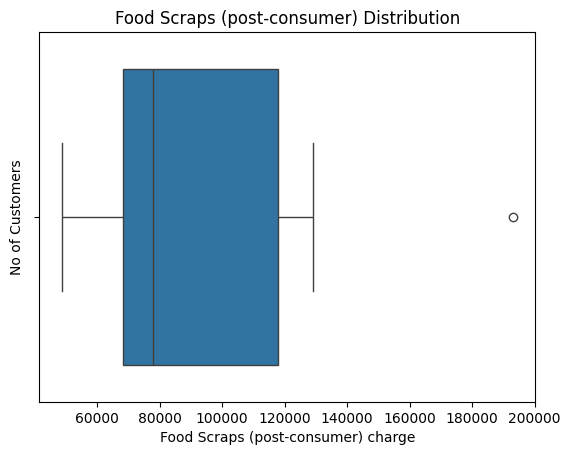

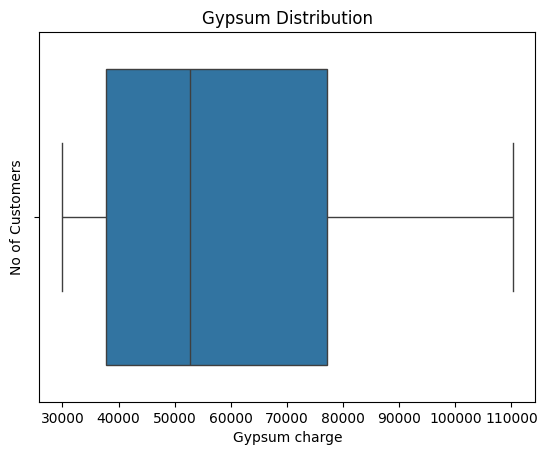

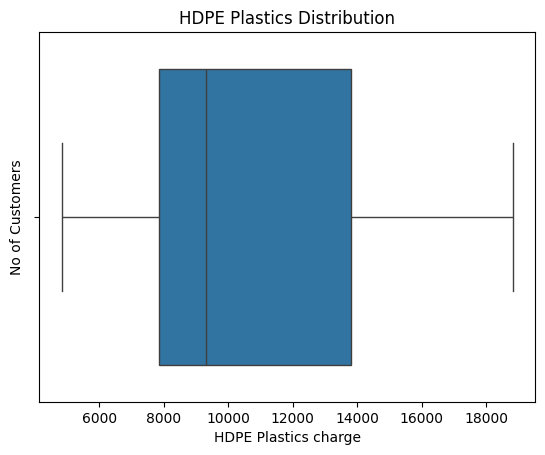

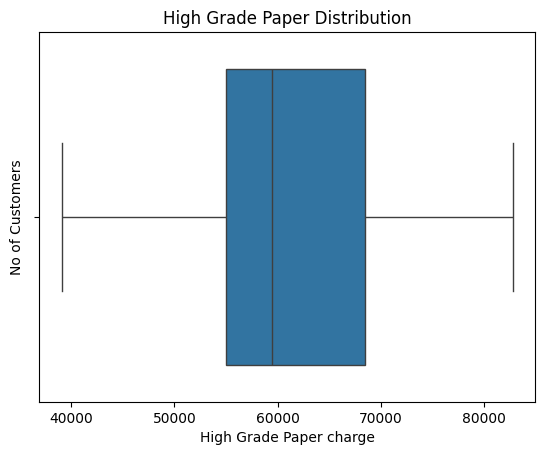

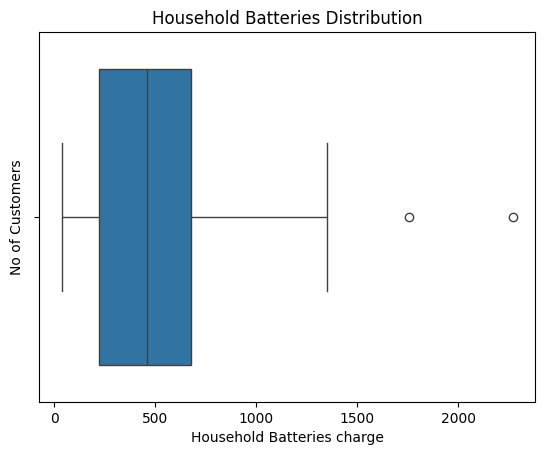

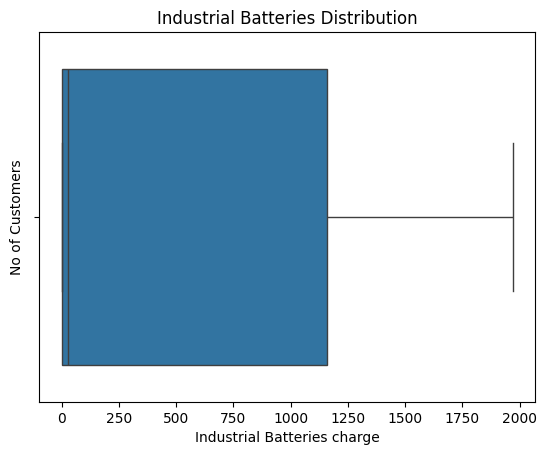

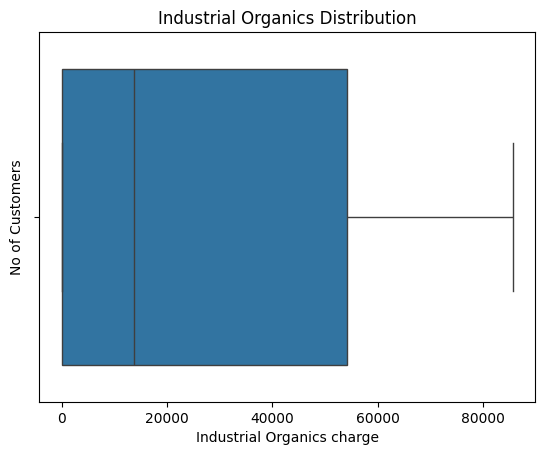

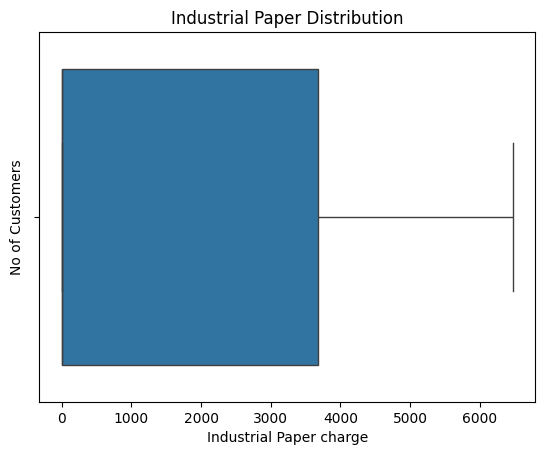

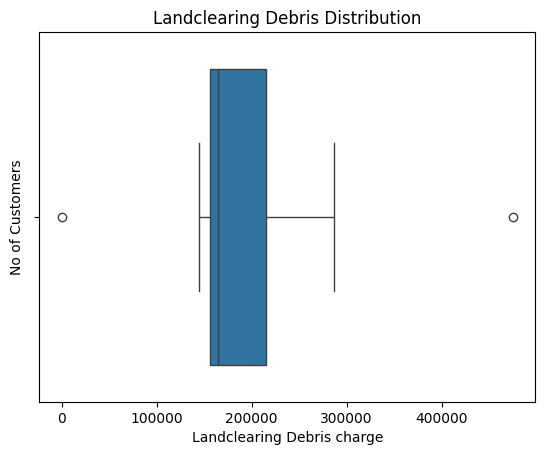

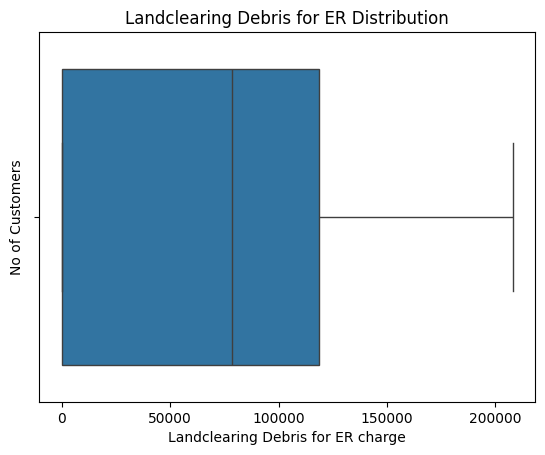

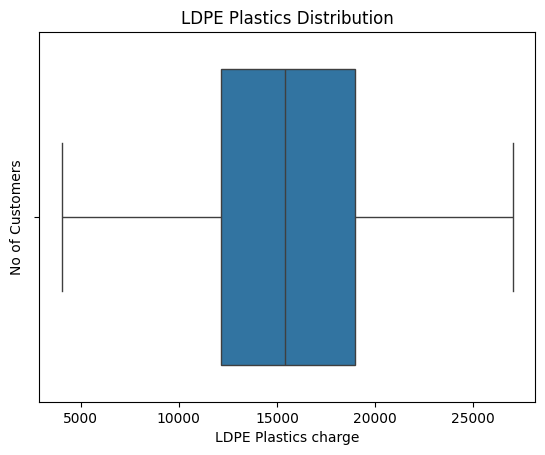

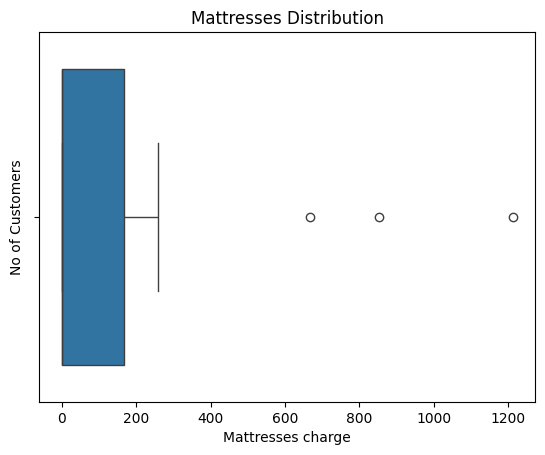

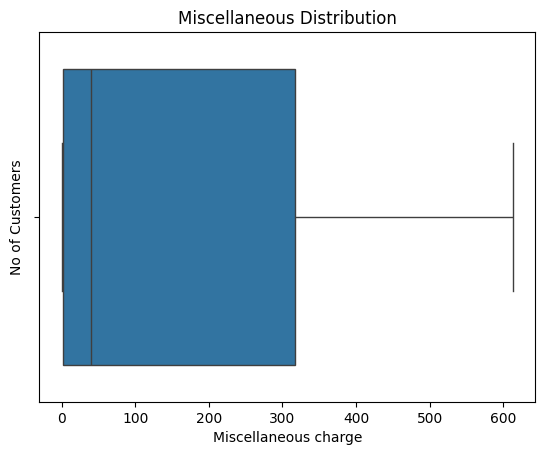

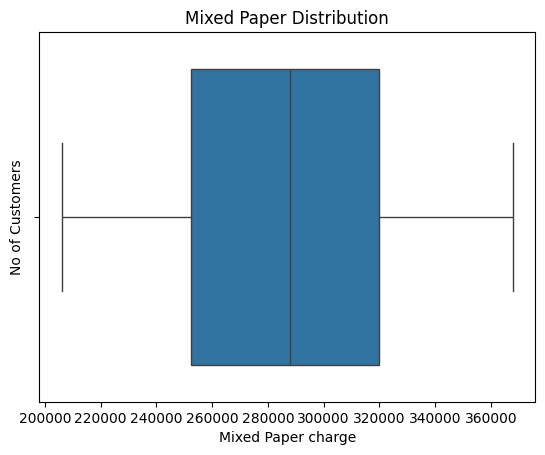

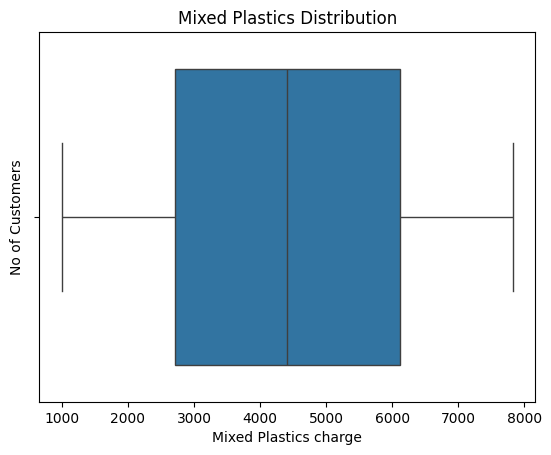

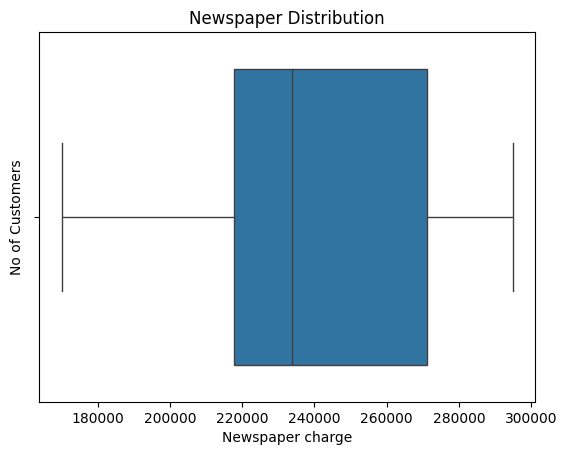

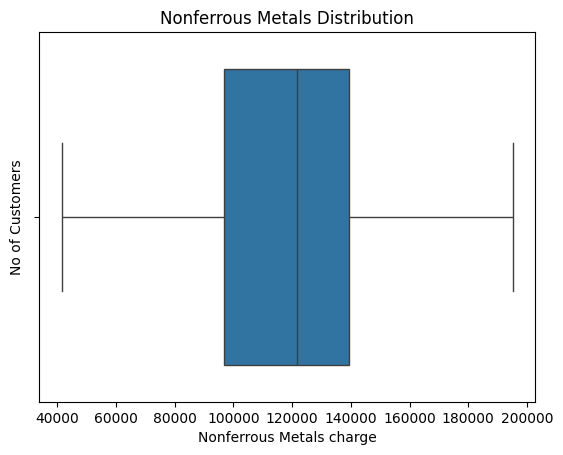

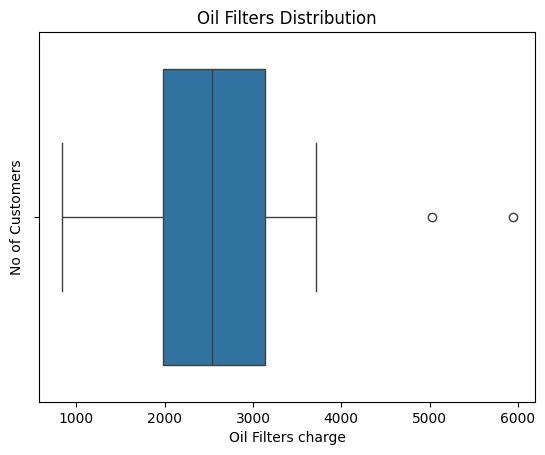

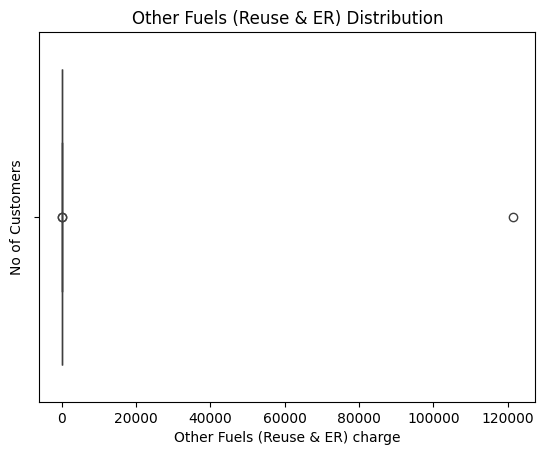

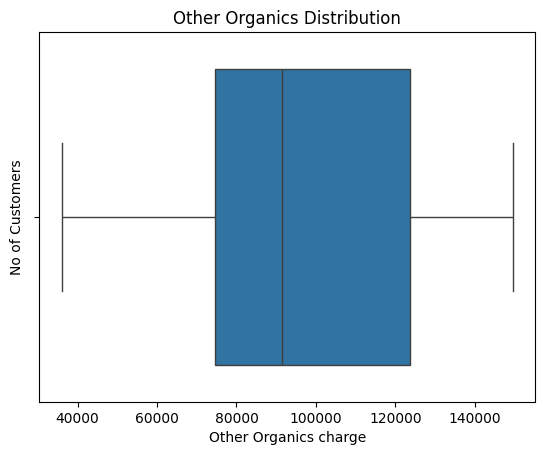

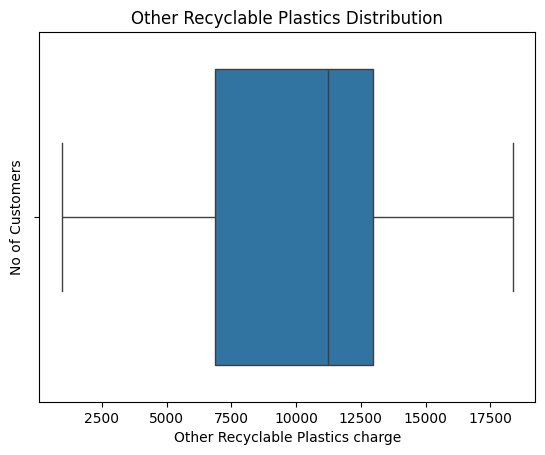

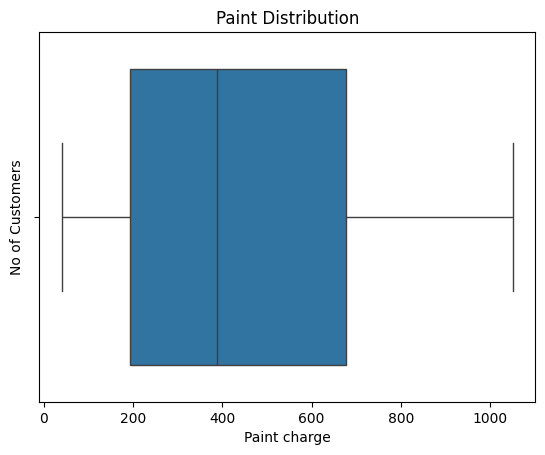

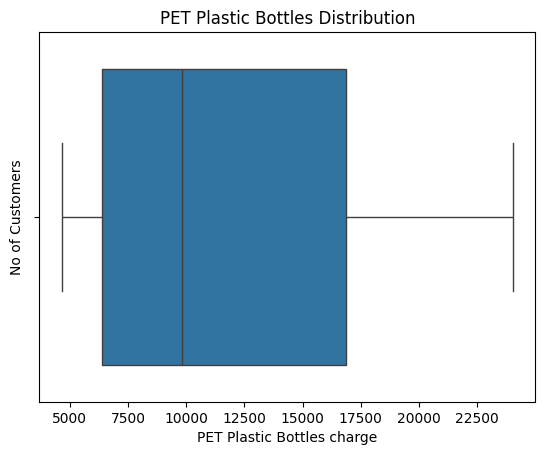

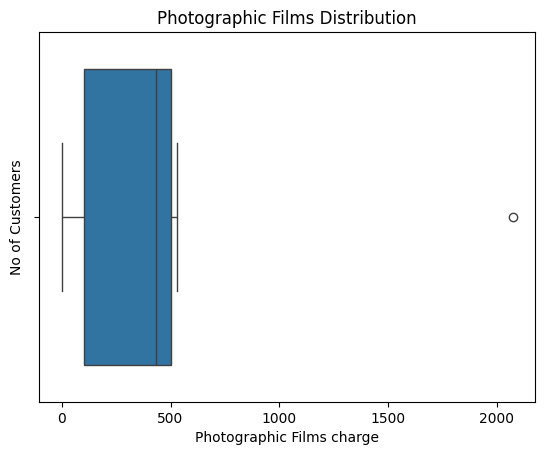

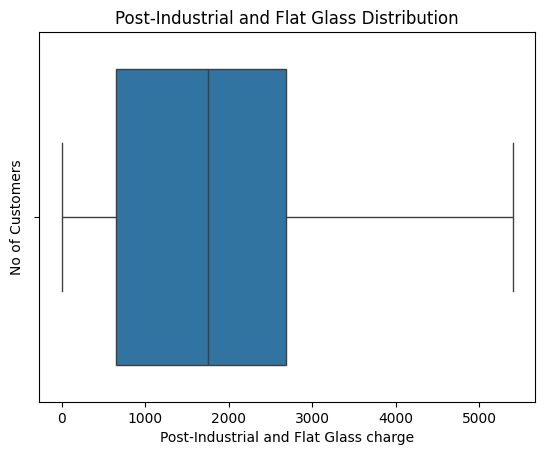

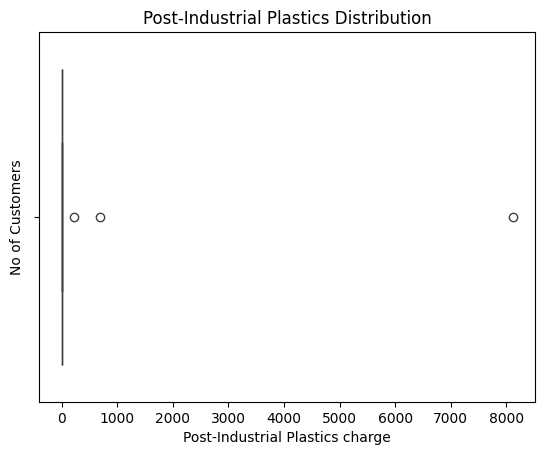

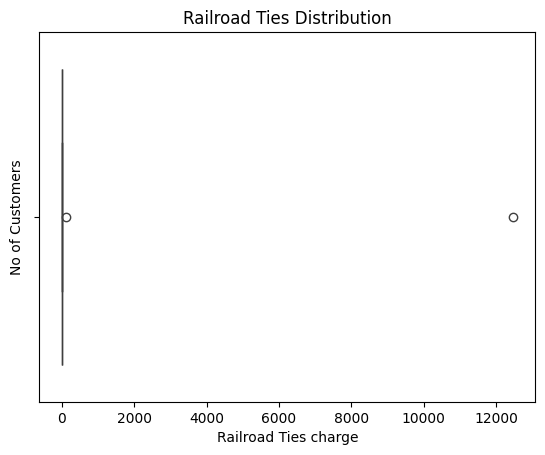

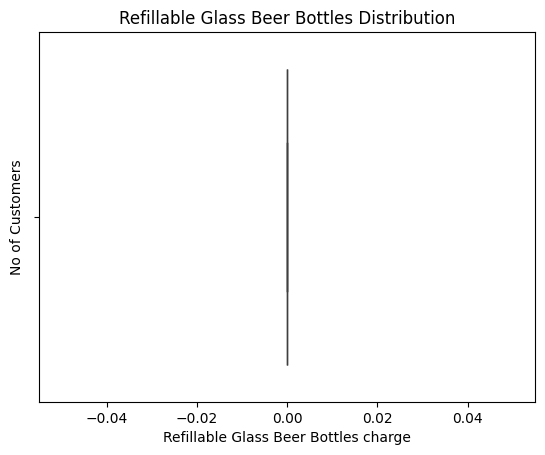

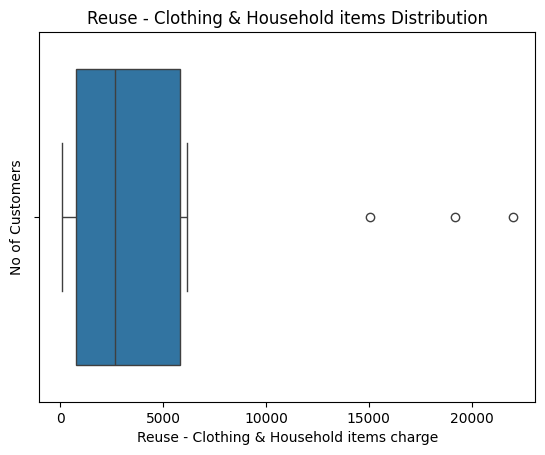

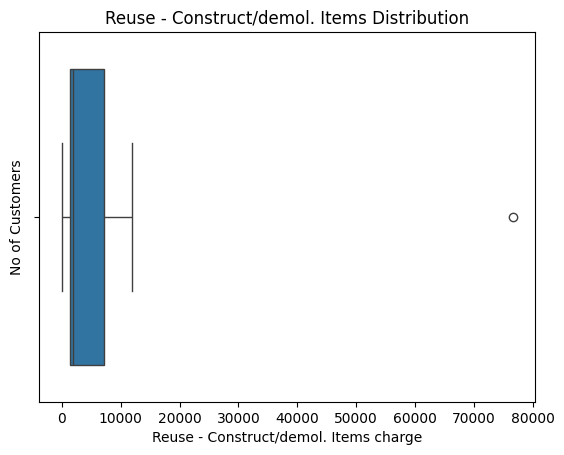

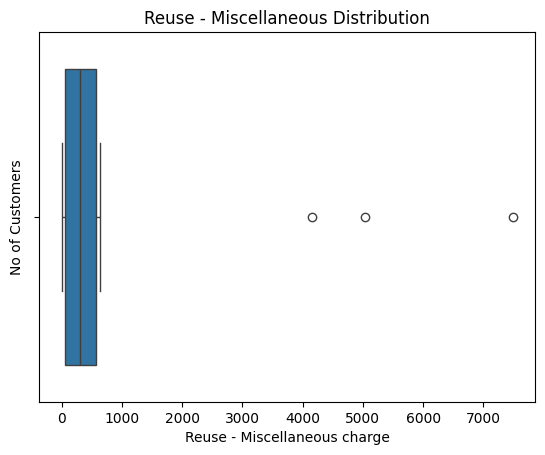

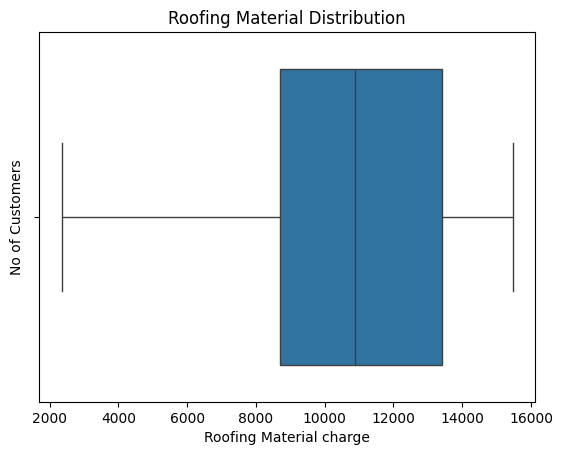

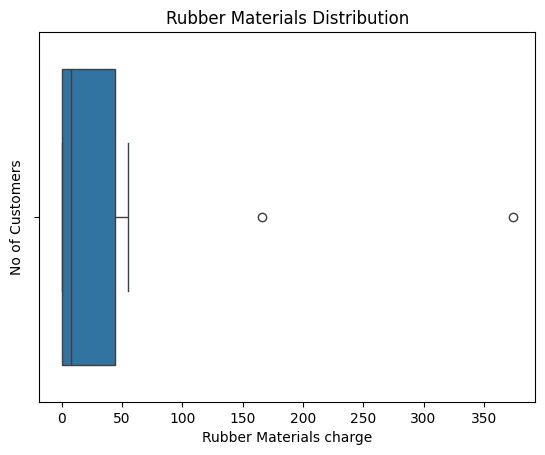

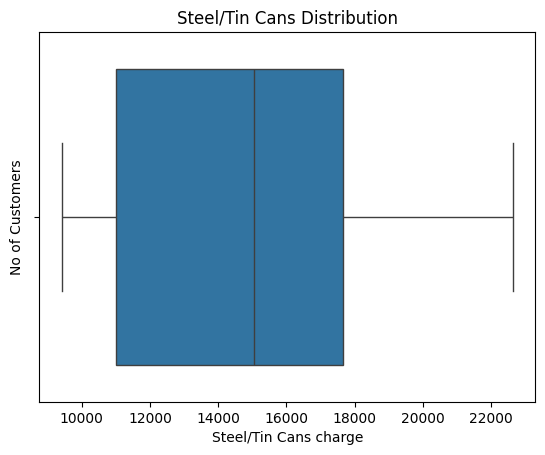

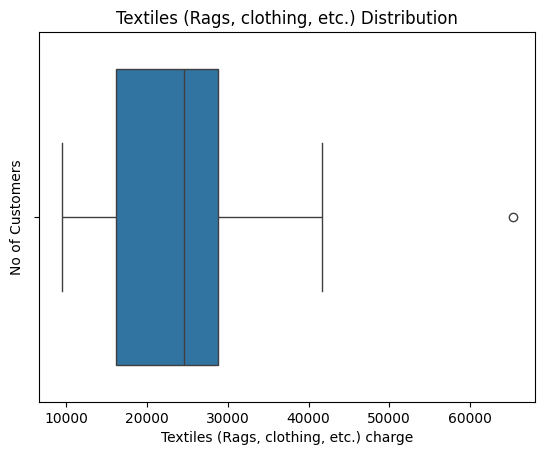

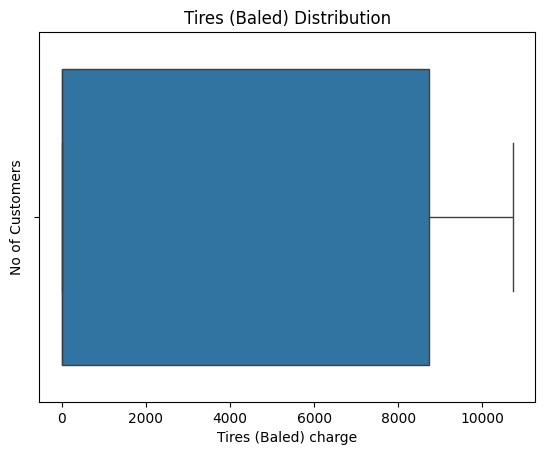

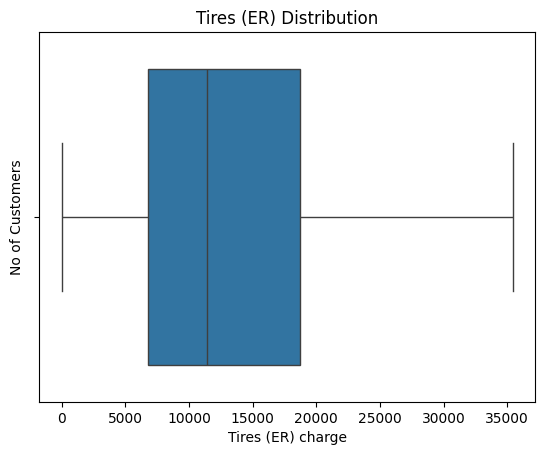

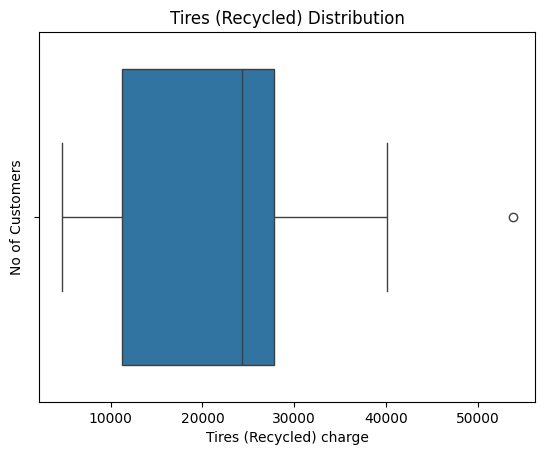

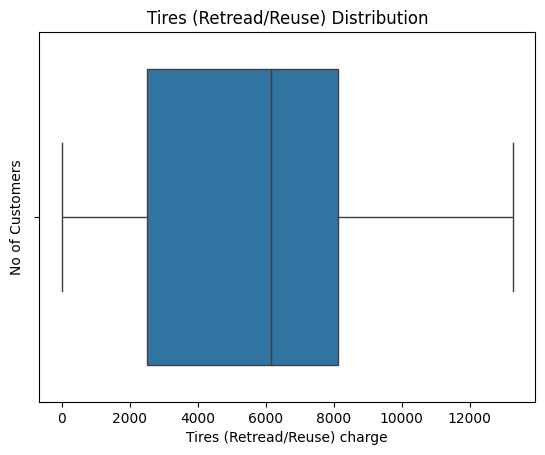

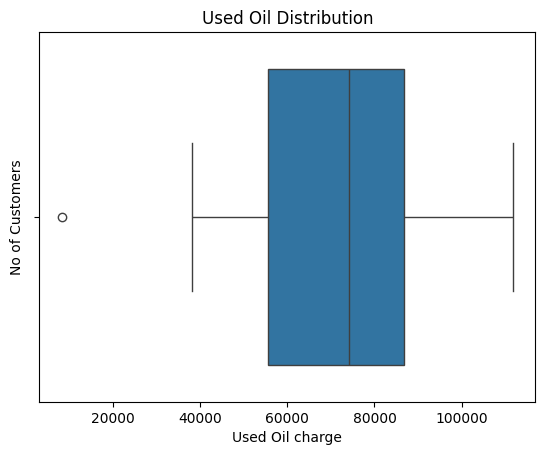

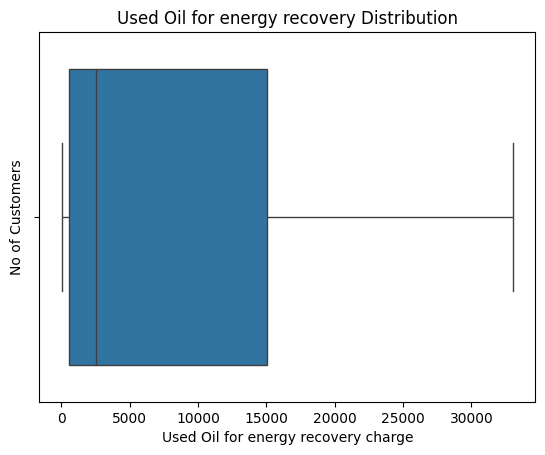

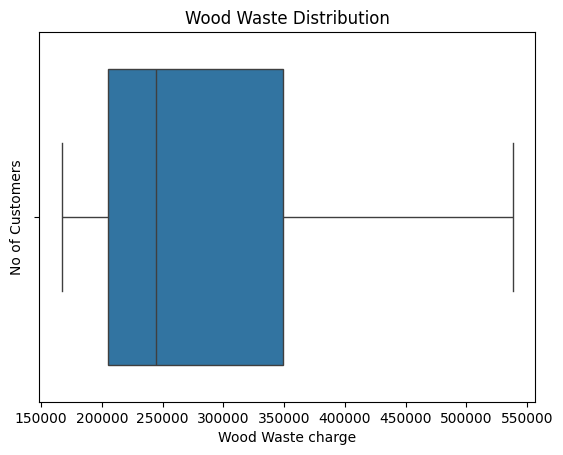

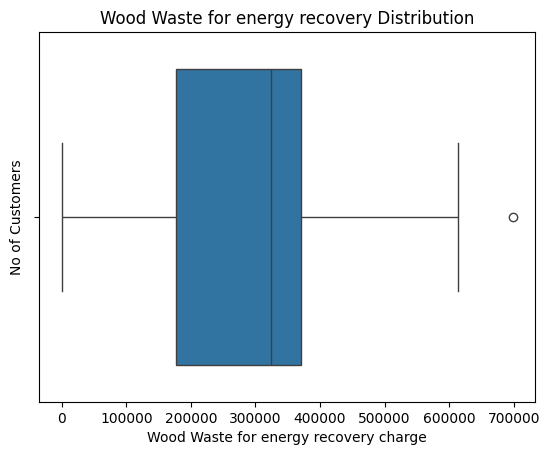

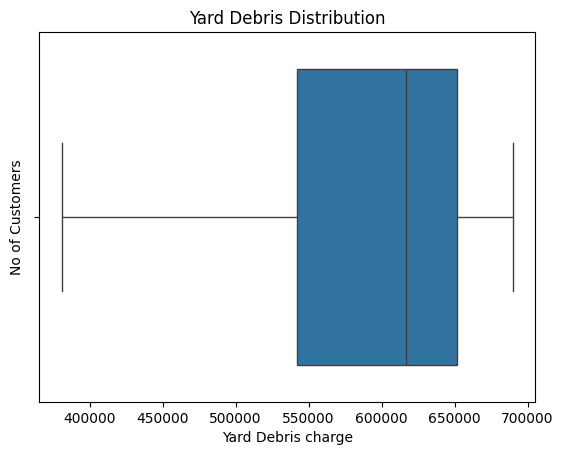

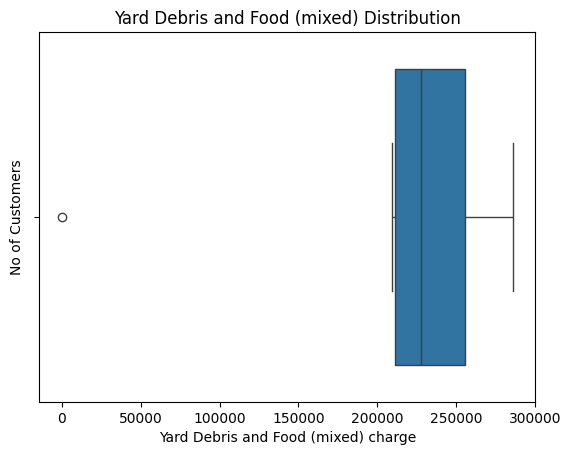

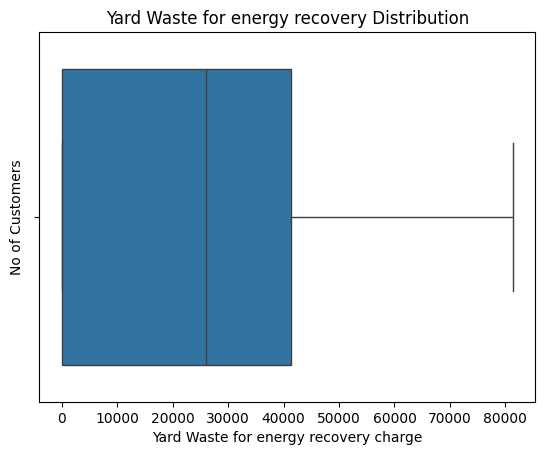

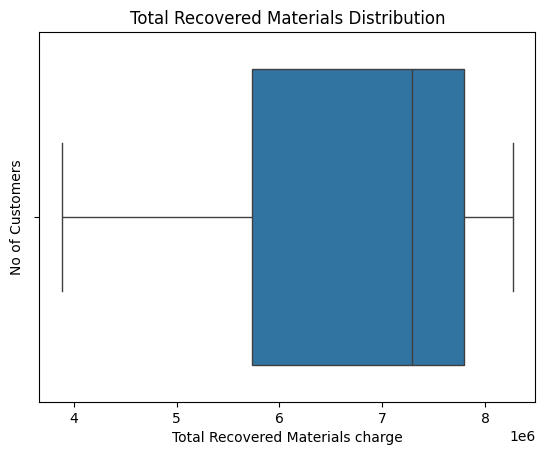

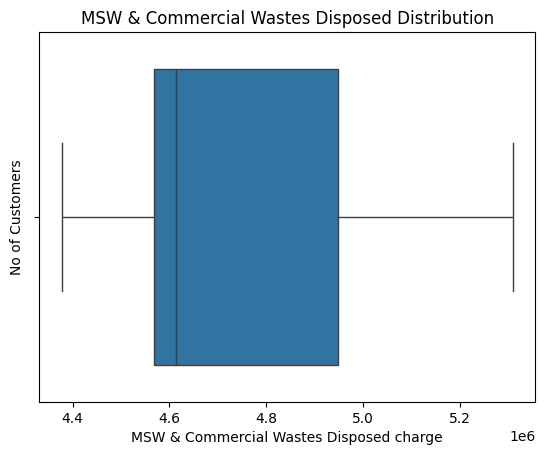

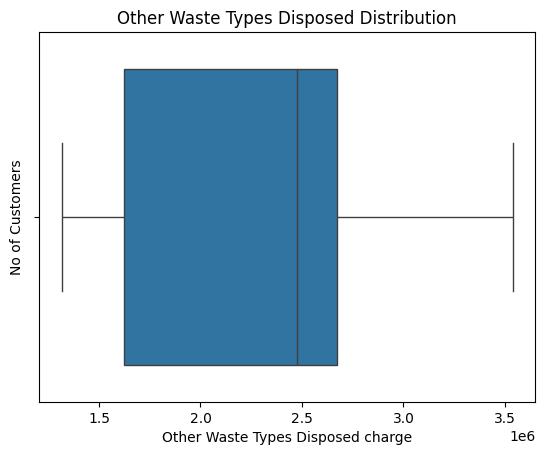

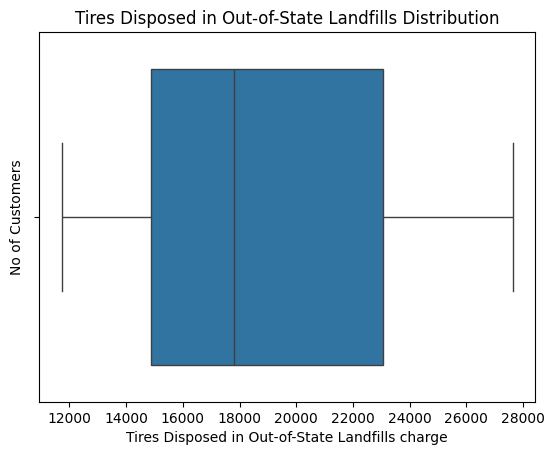

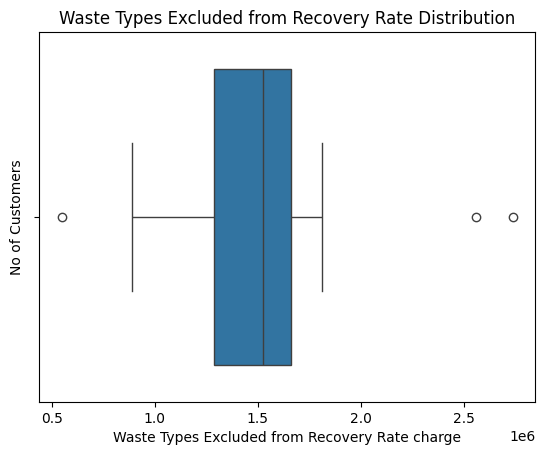

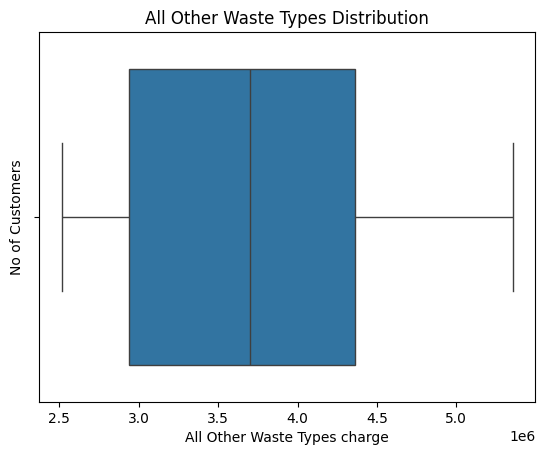

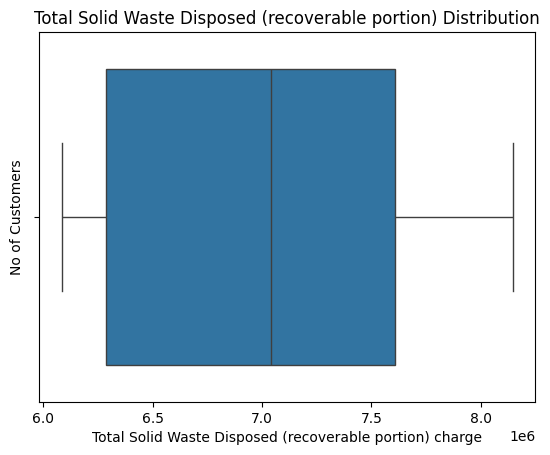

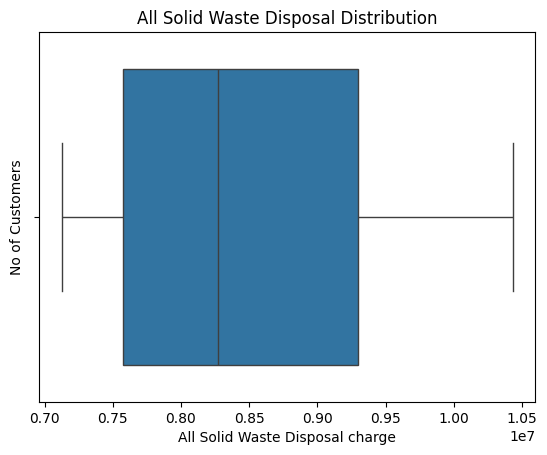

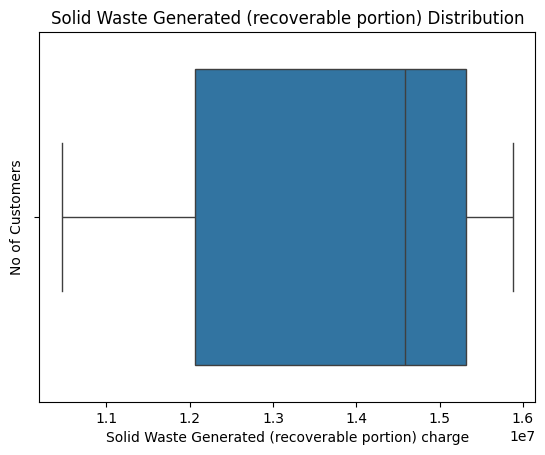

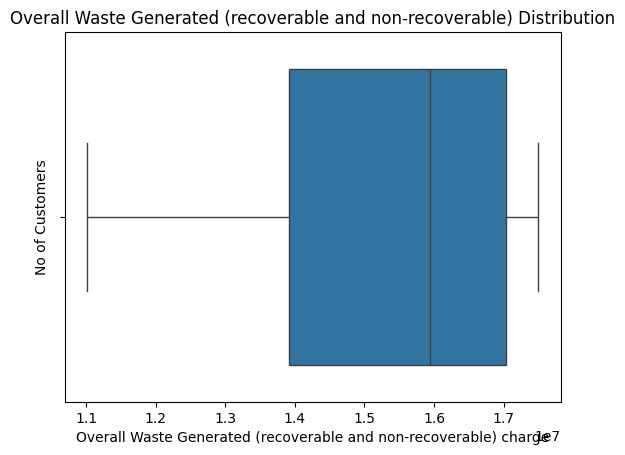

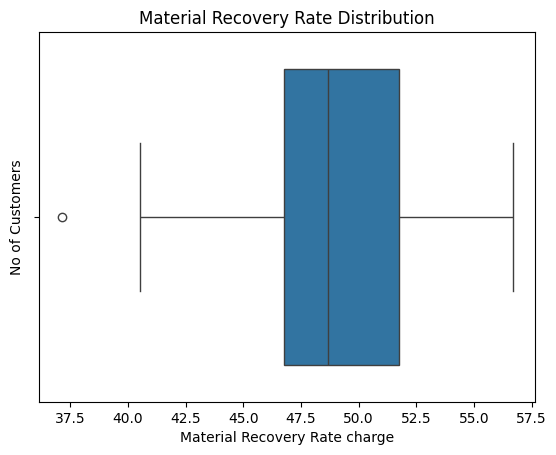

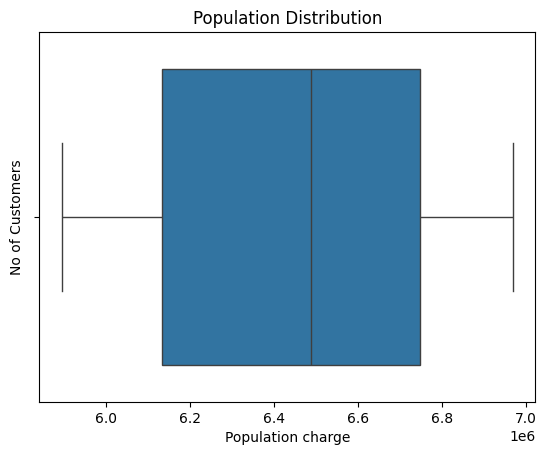

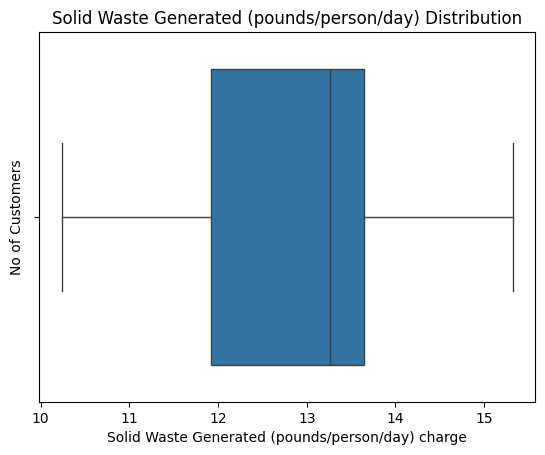

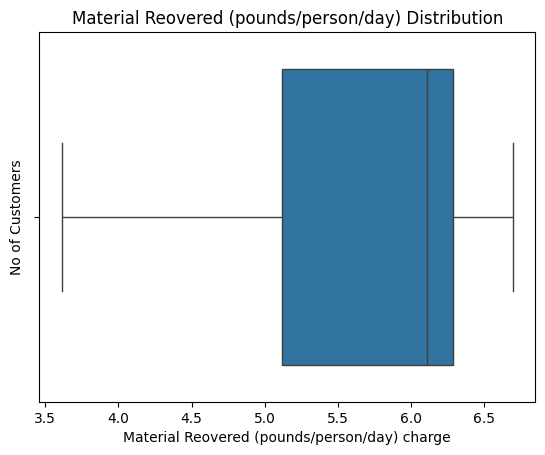

In [13]:
for i in num:
    ax = sns.boxplot(data = df,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

# Remove the Outliers

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for col in num:
    lr,ur = remove_outlier(df[col])
    df[col] = np.where(df[col]>ur,ur,df[col])
    df[col] = np.where(df[col]<lr,lr,df[col])

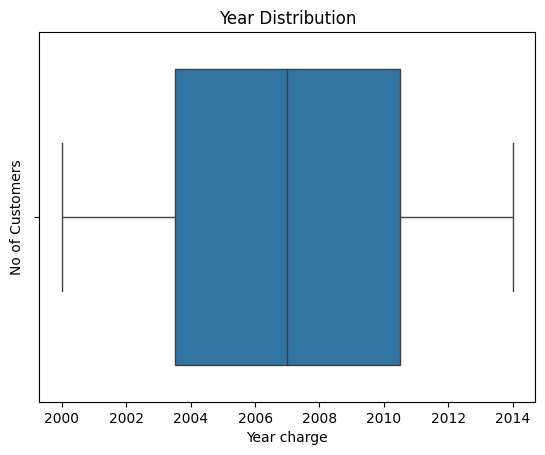

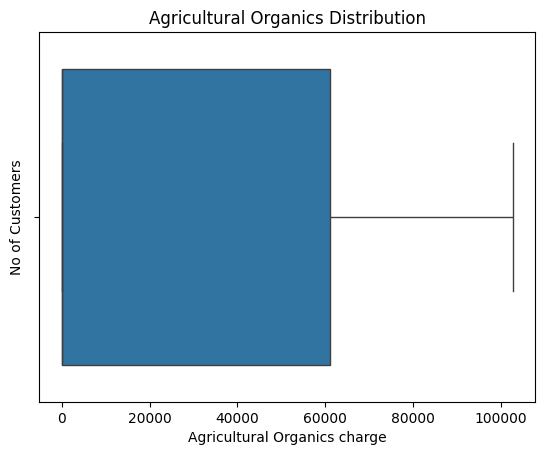

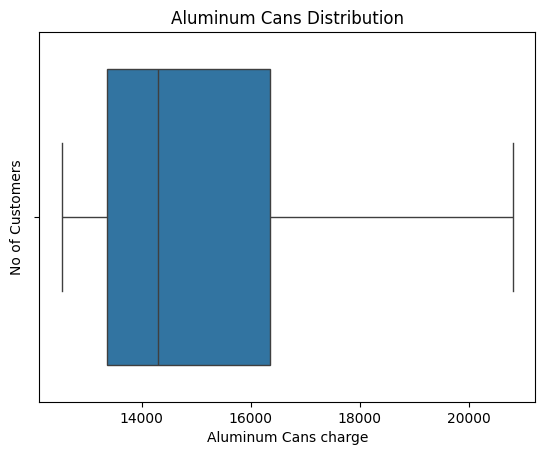

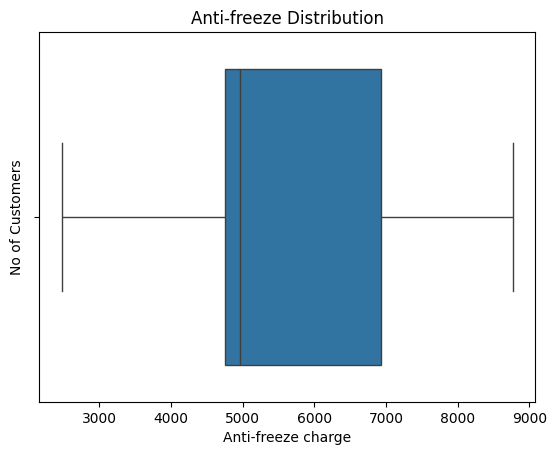

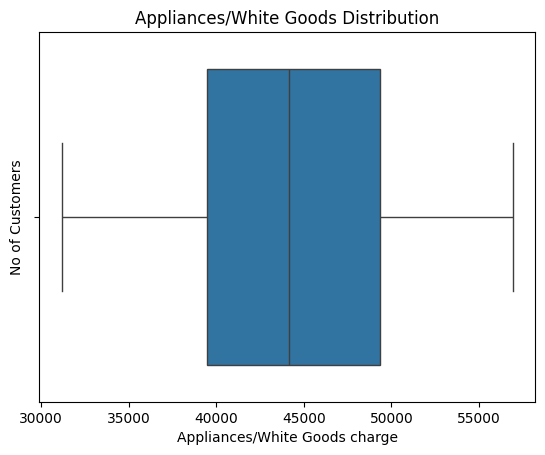

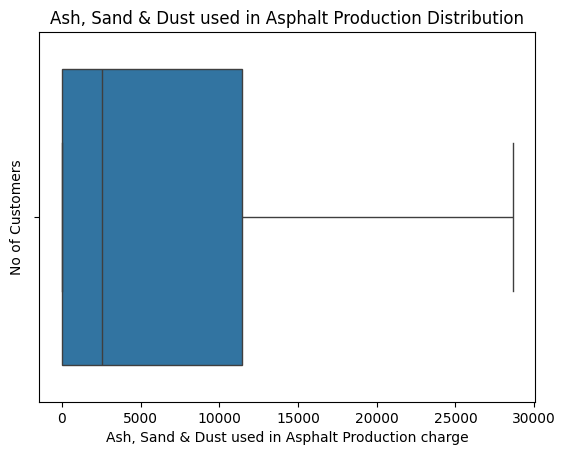

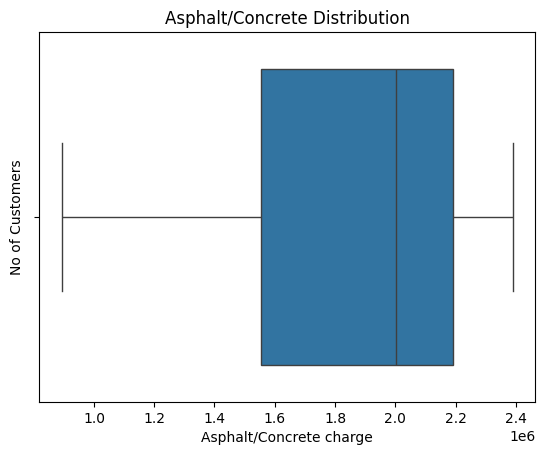

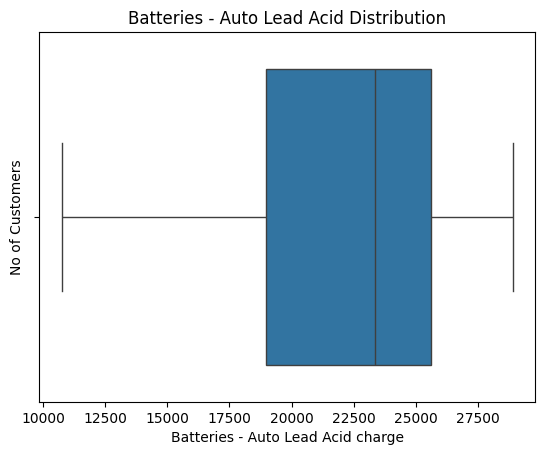

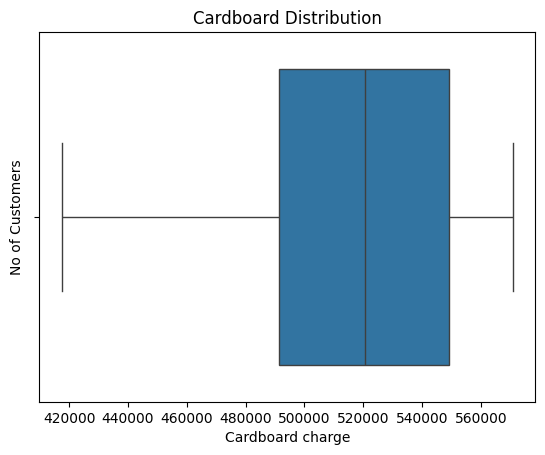

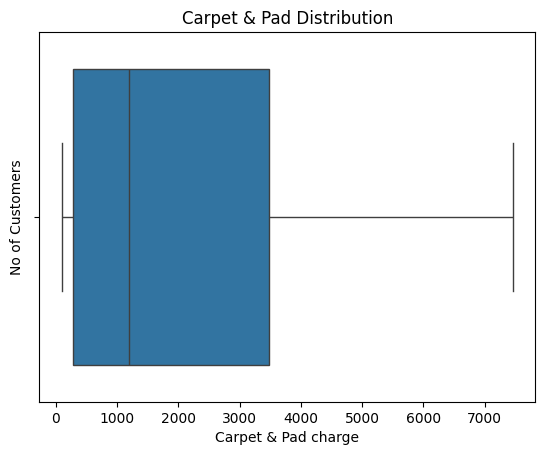

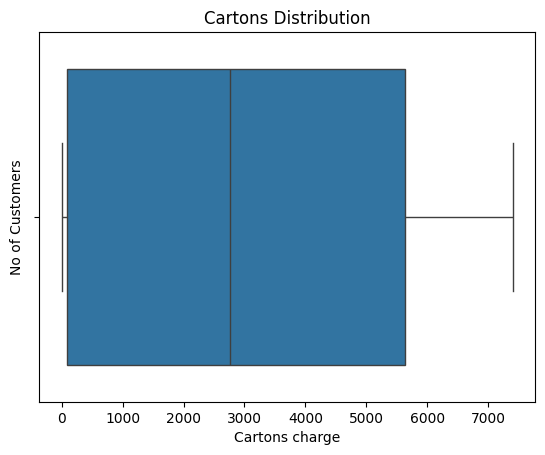

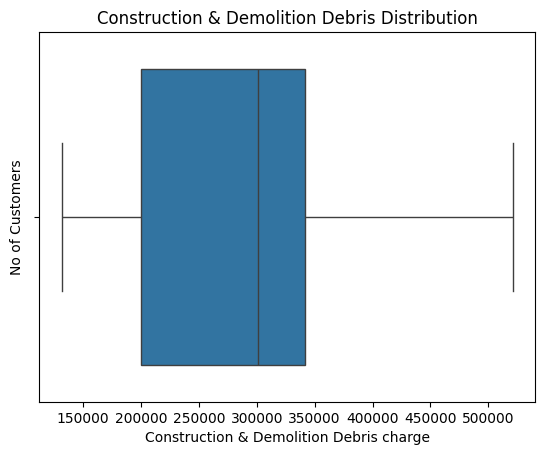

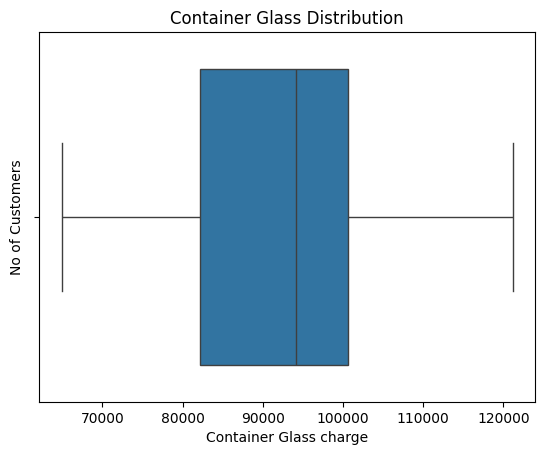

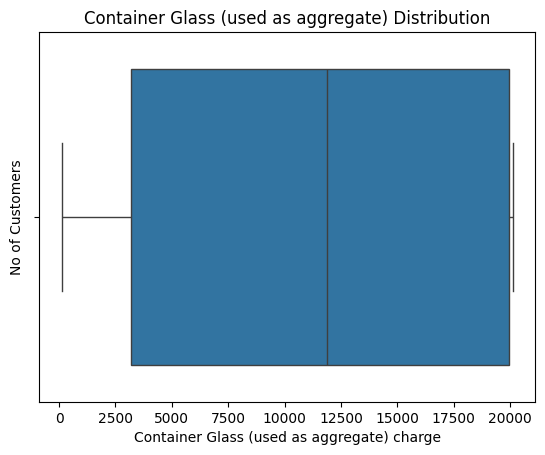

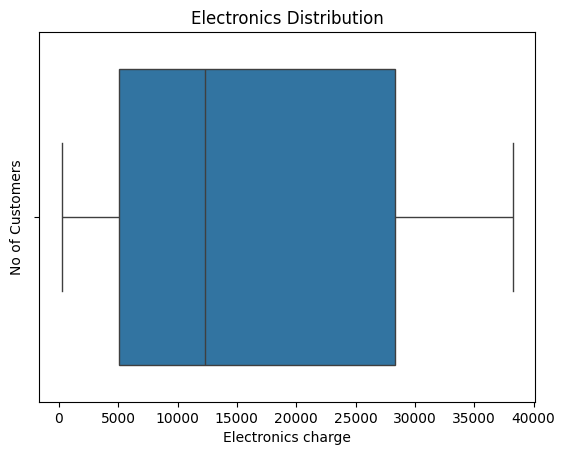

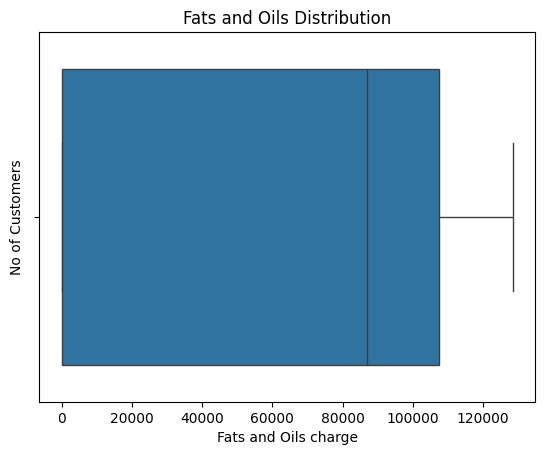

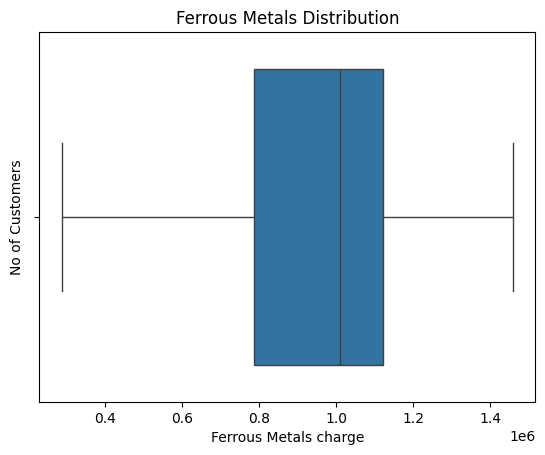

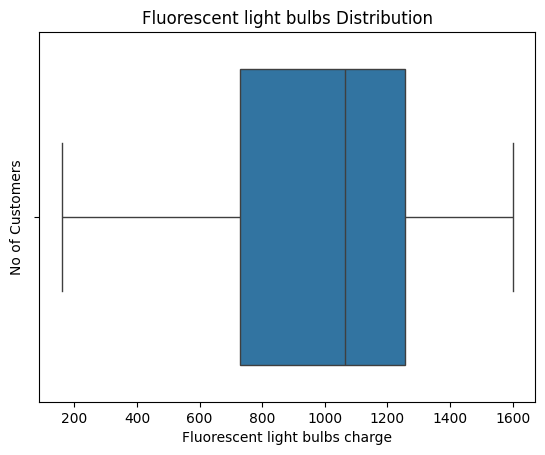

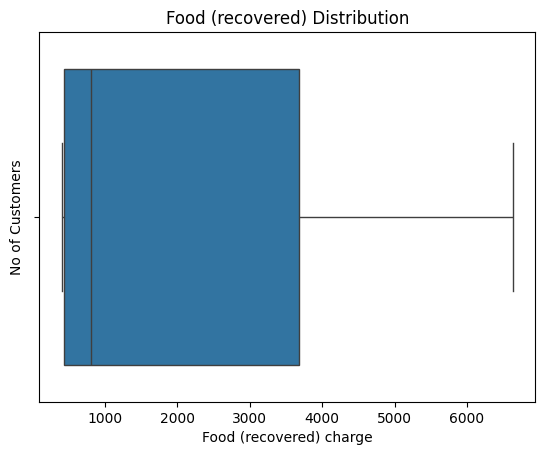

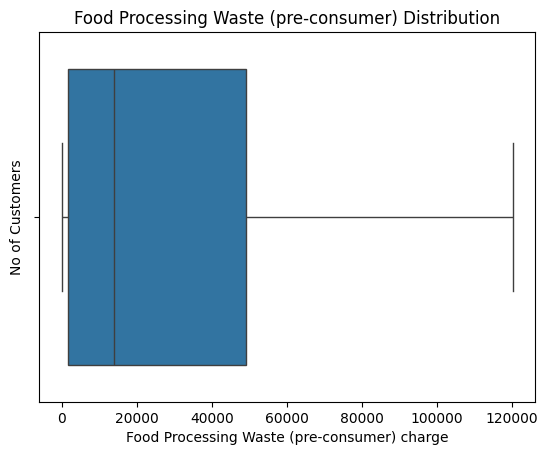

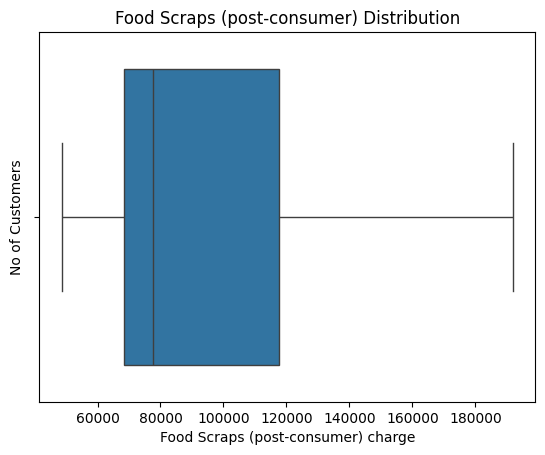

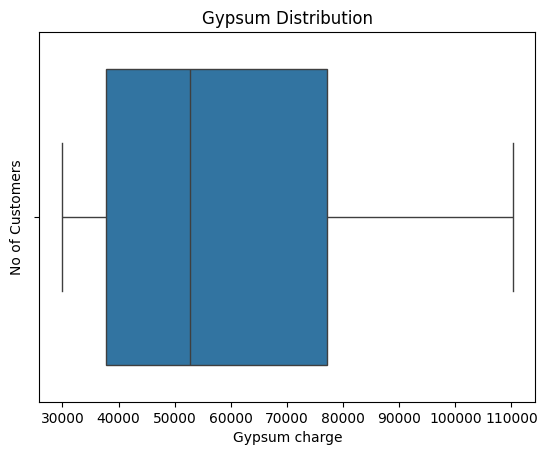

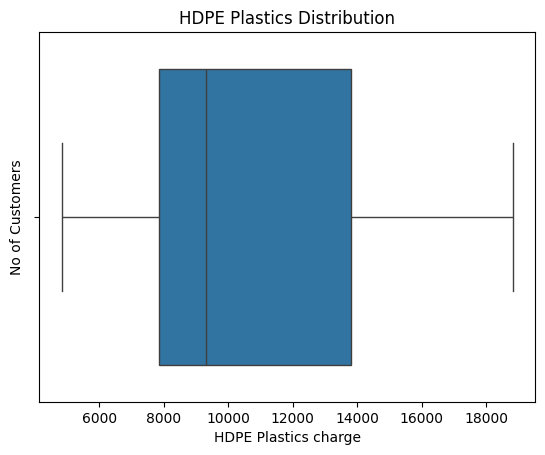

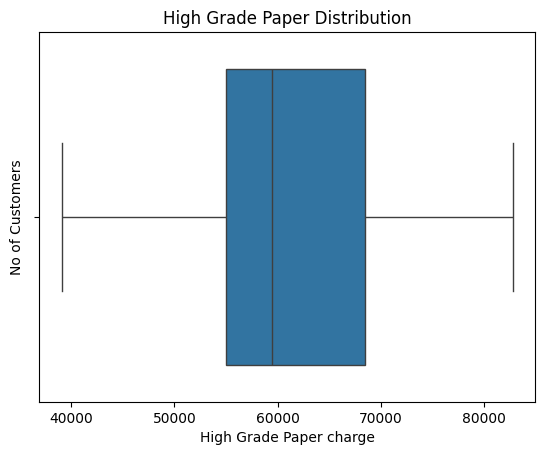

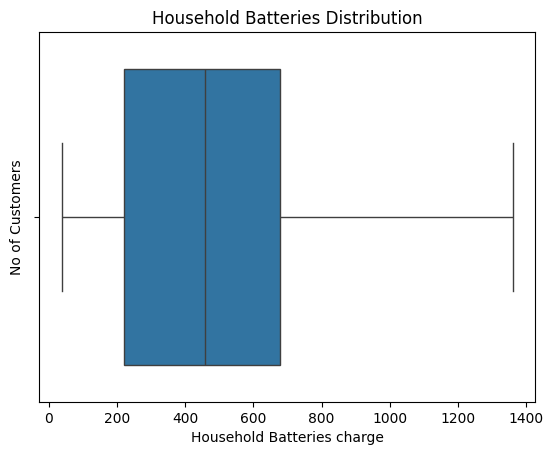

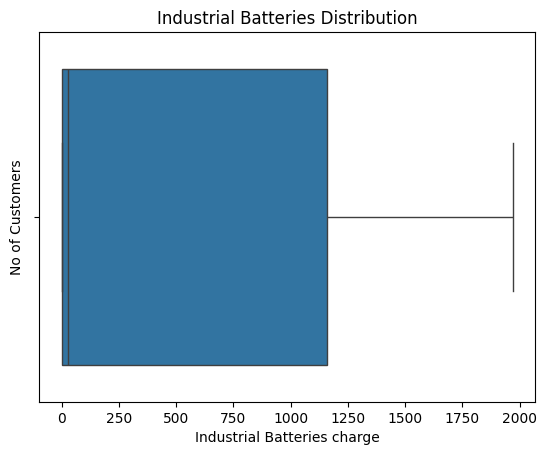

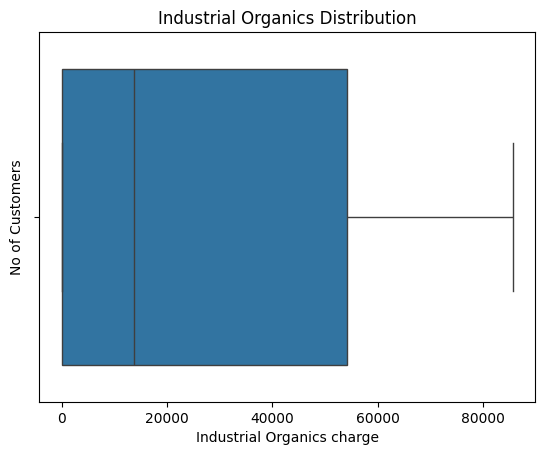

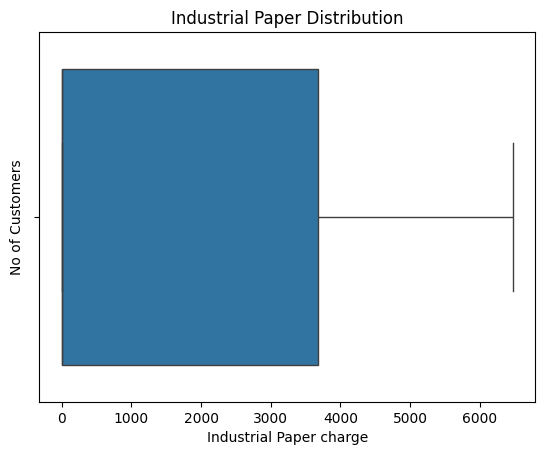

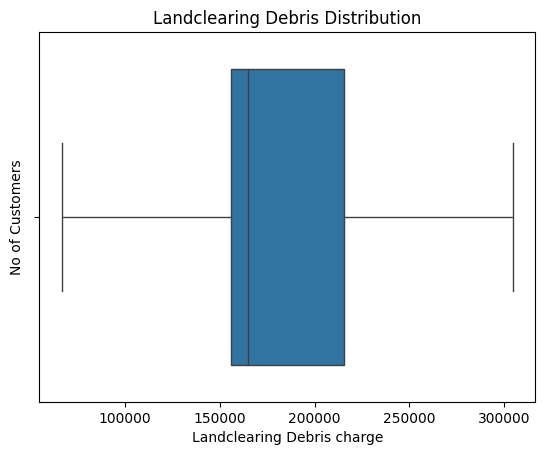

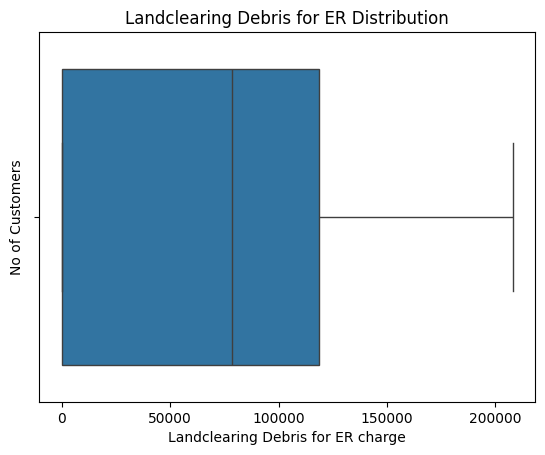

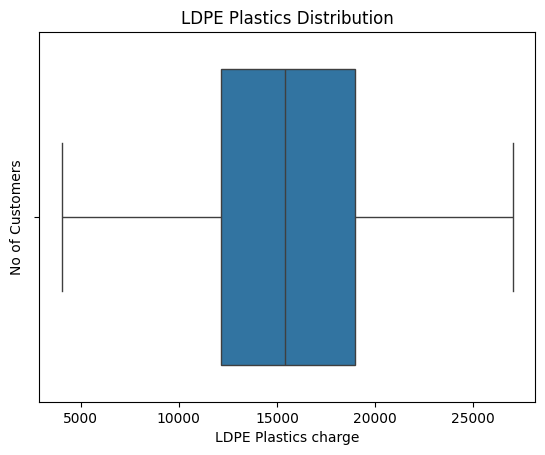

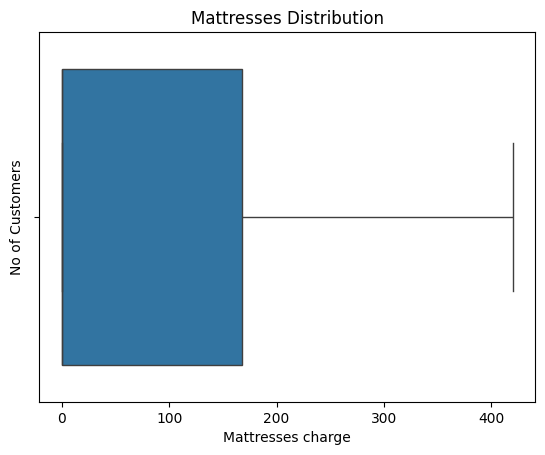

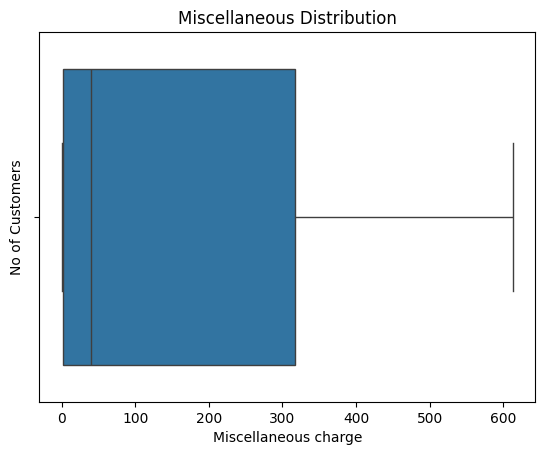

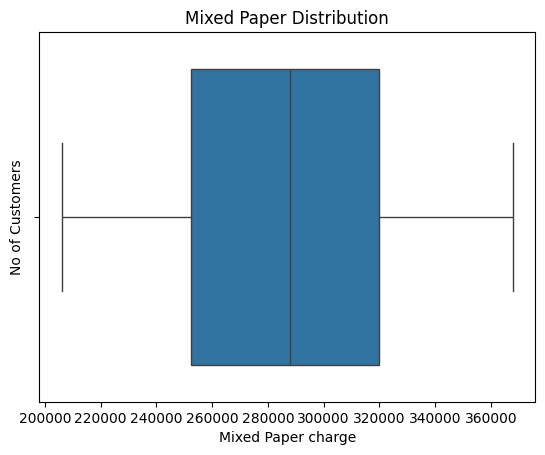

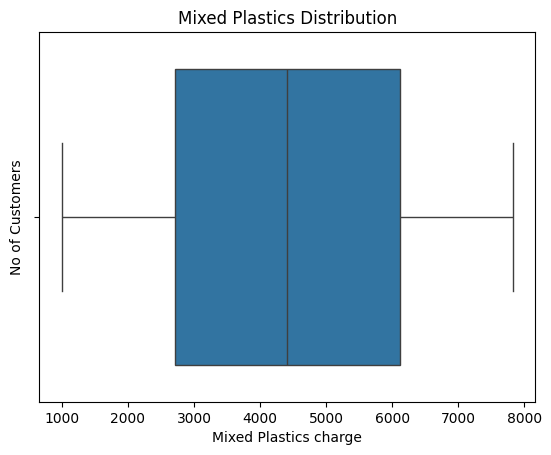

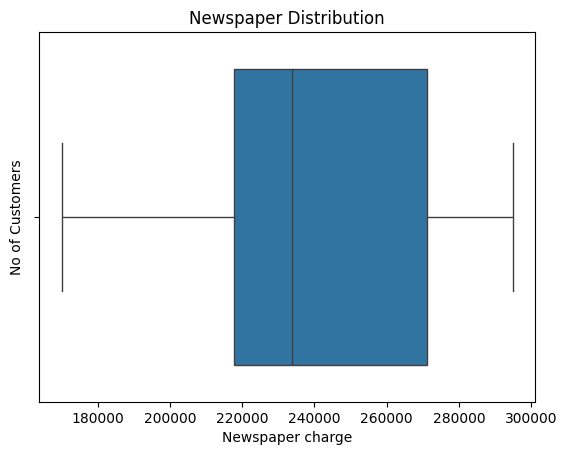

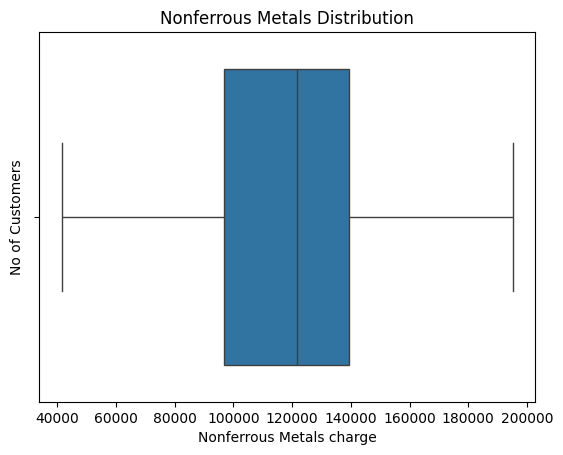

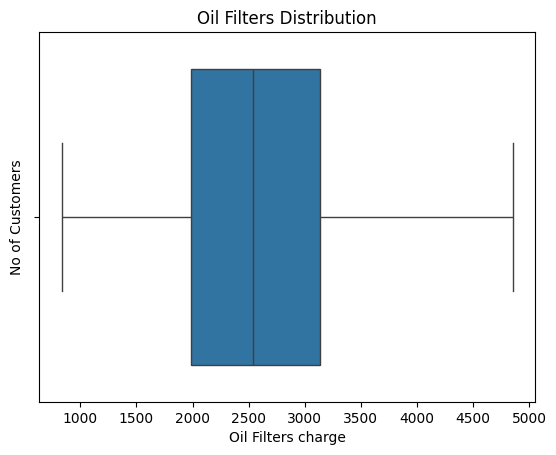

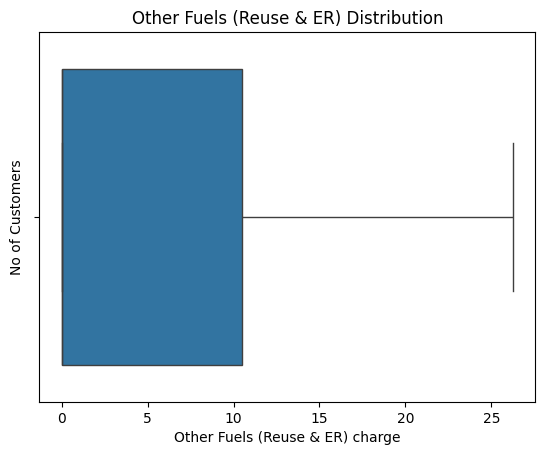

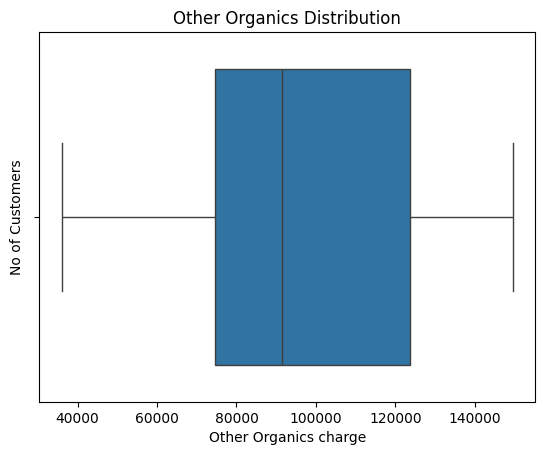

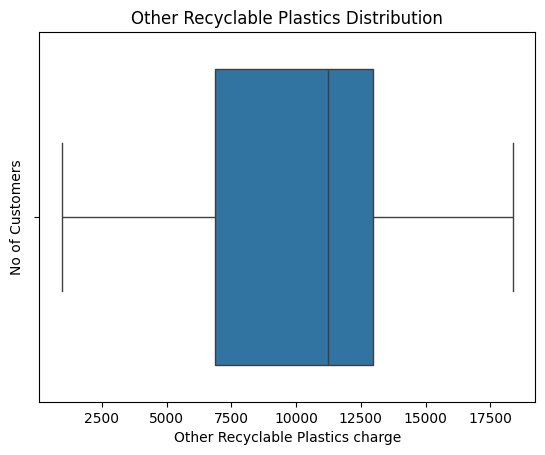

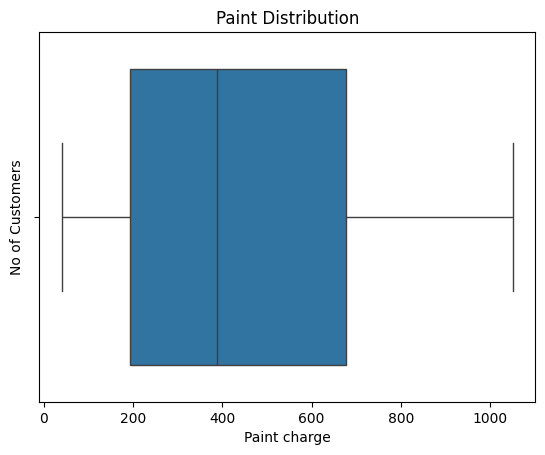

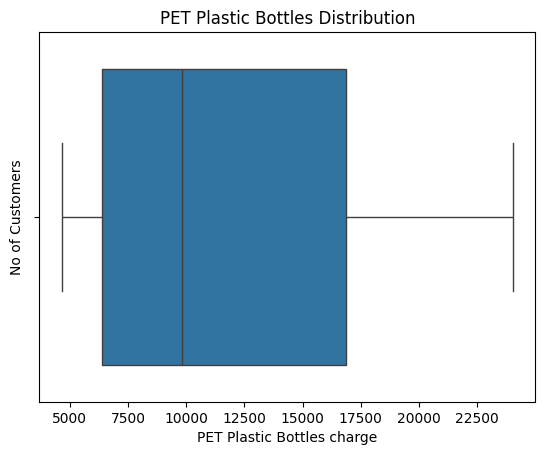

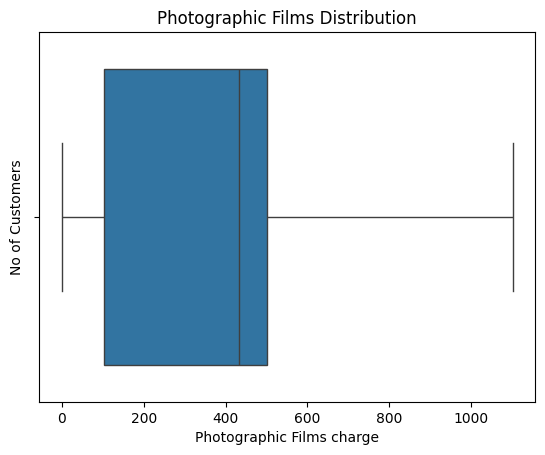

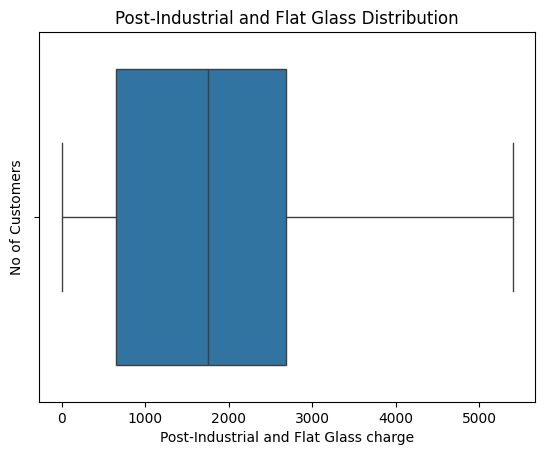

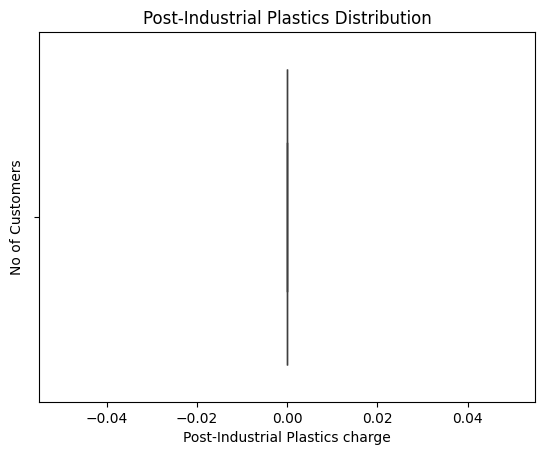

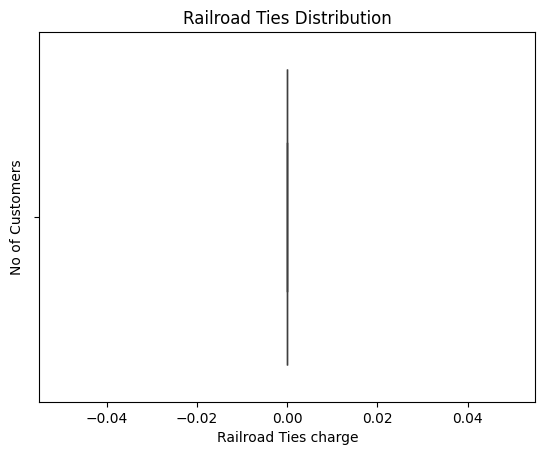

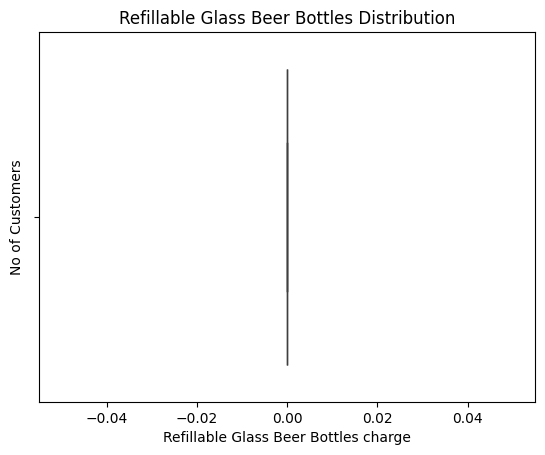

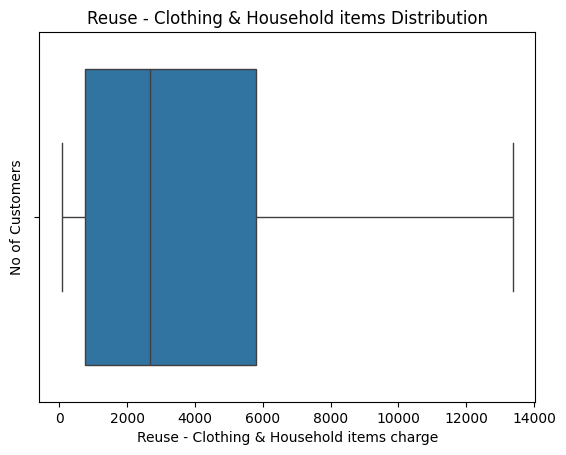

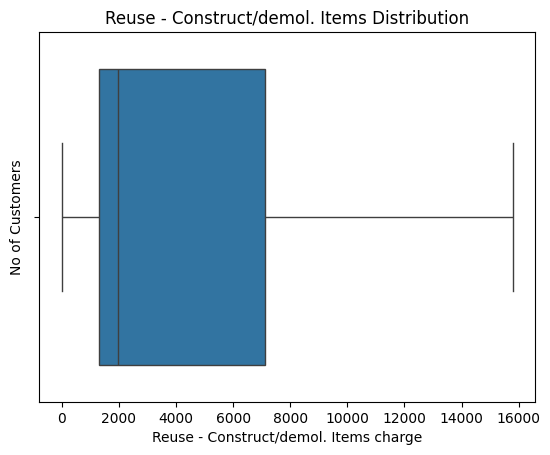

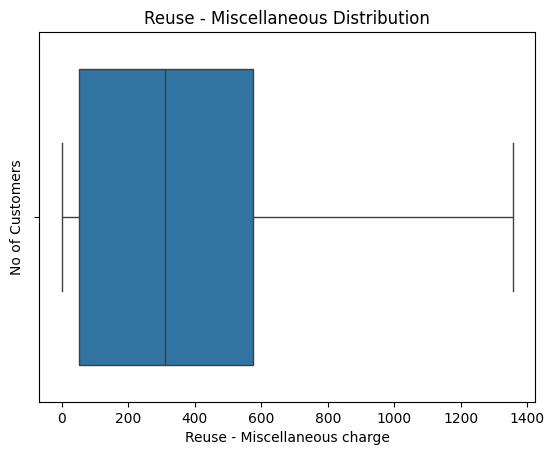

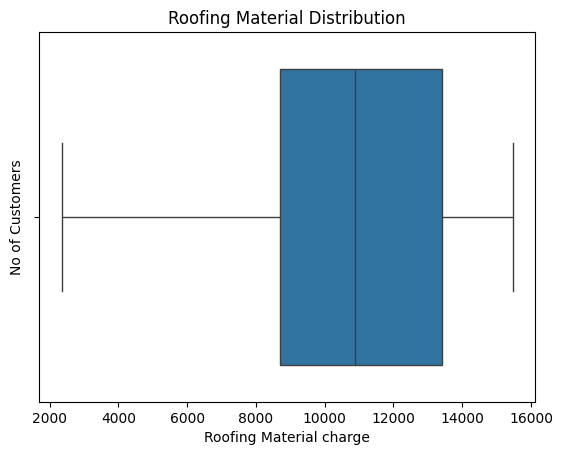

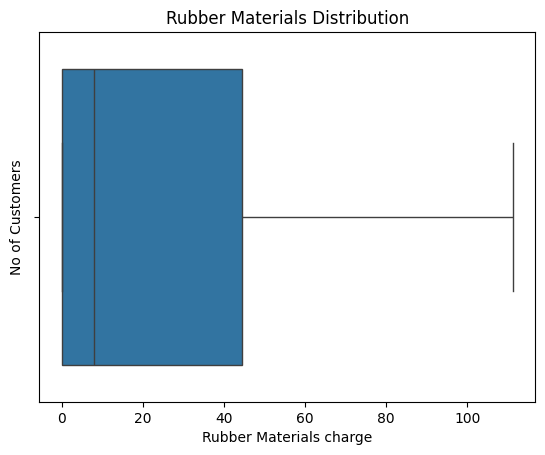

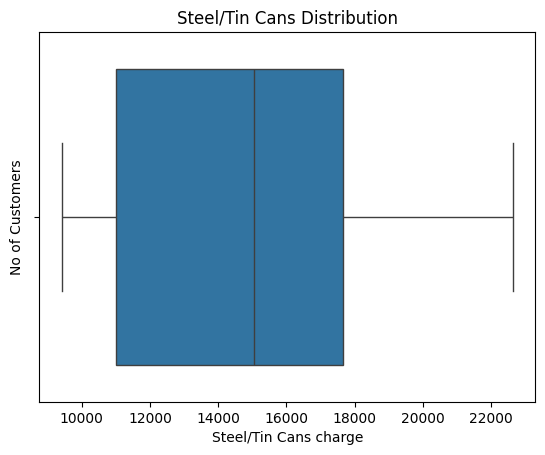

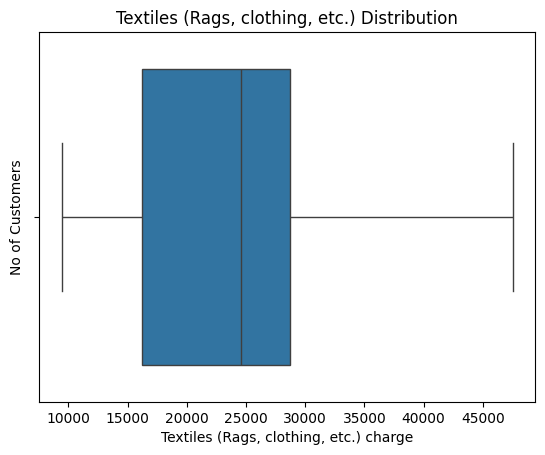

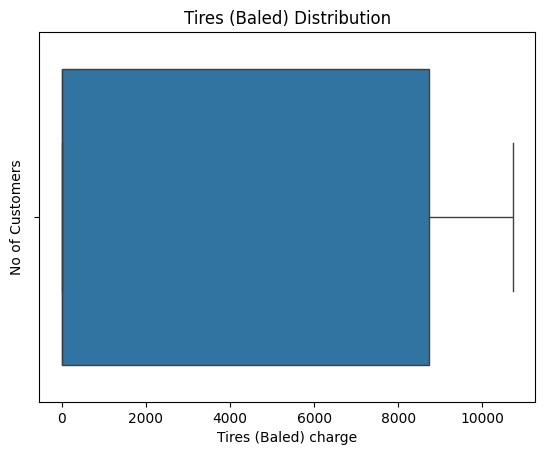

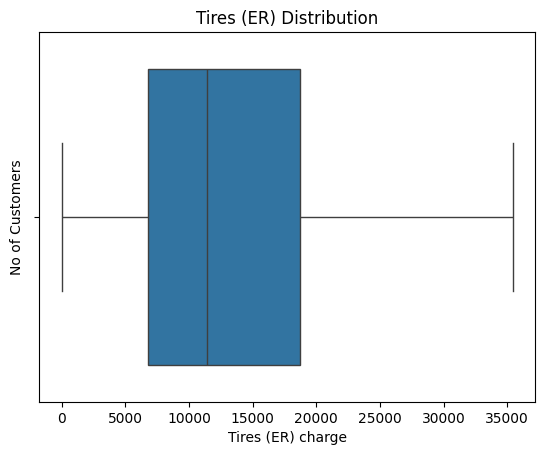

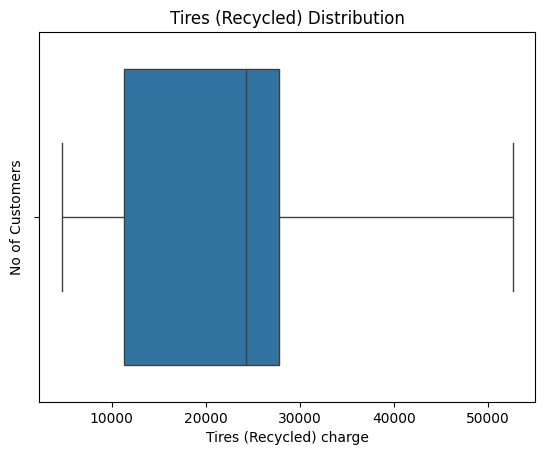

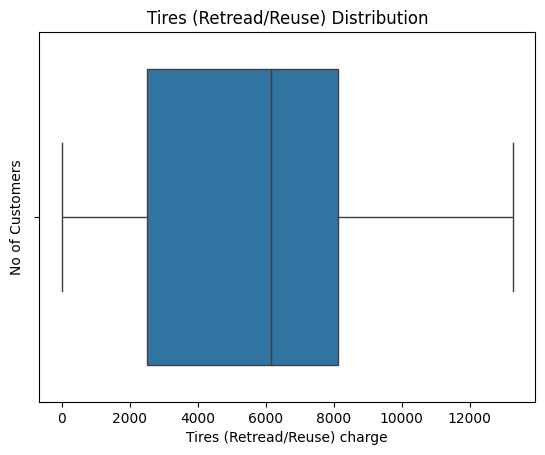

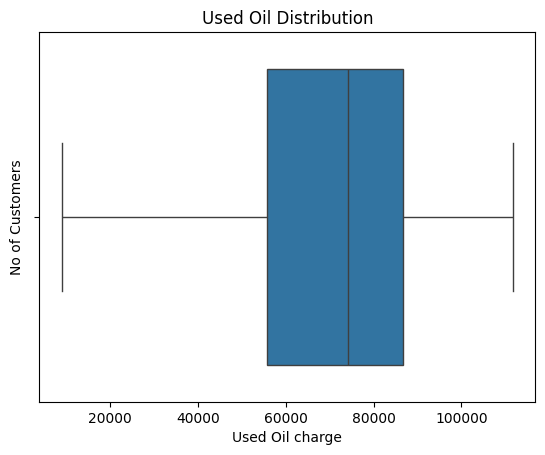

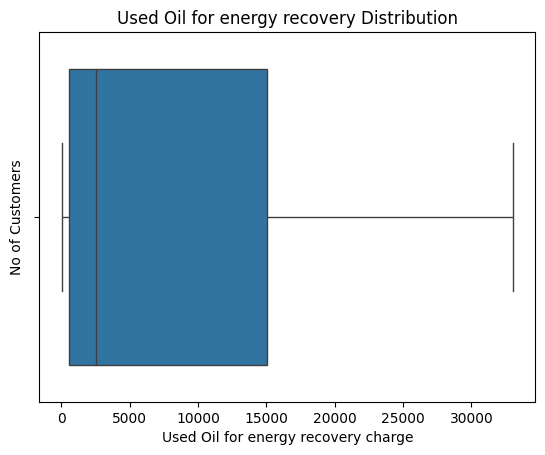

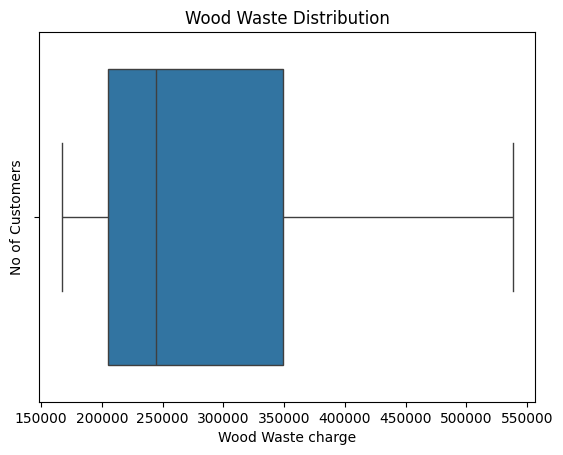

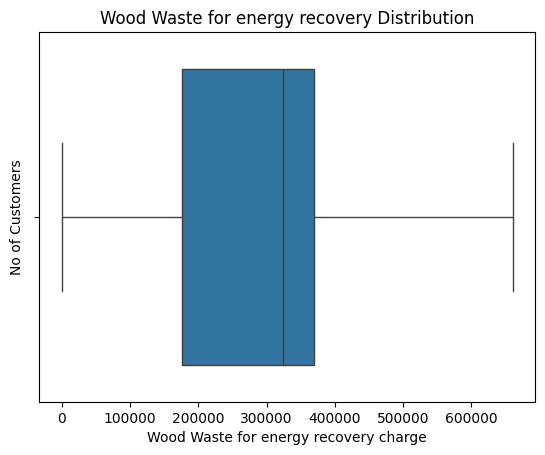

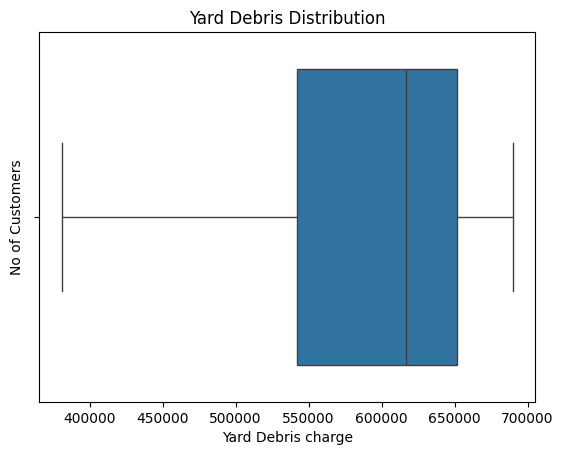

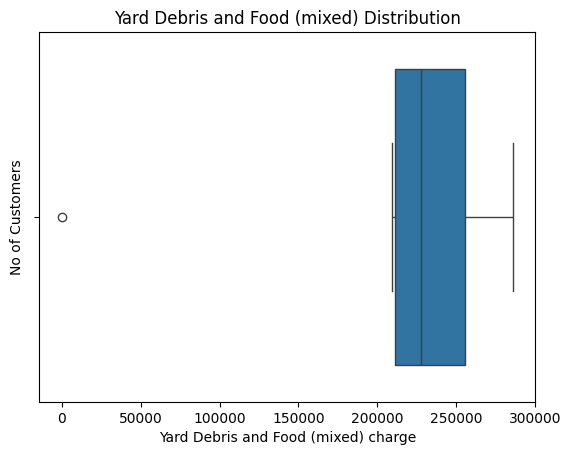

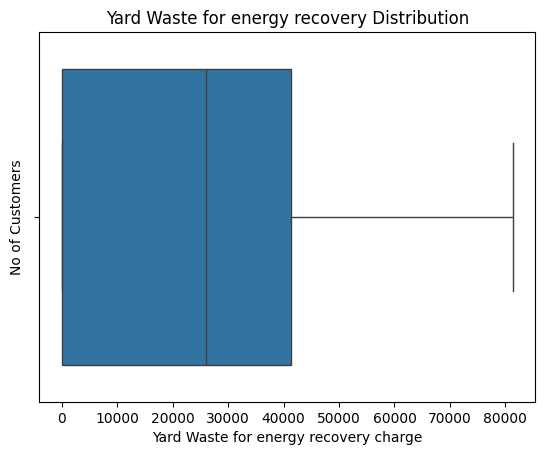

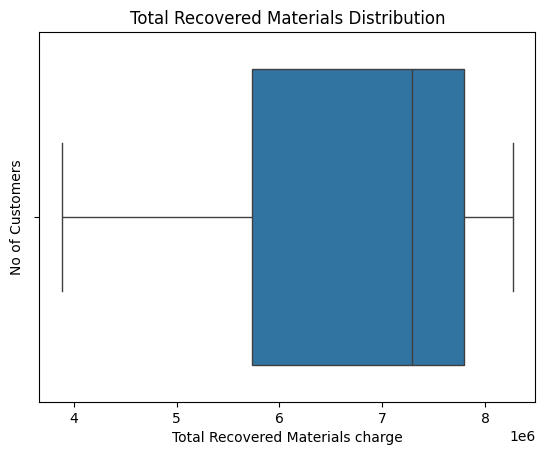

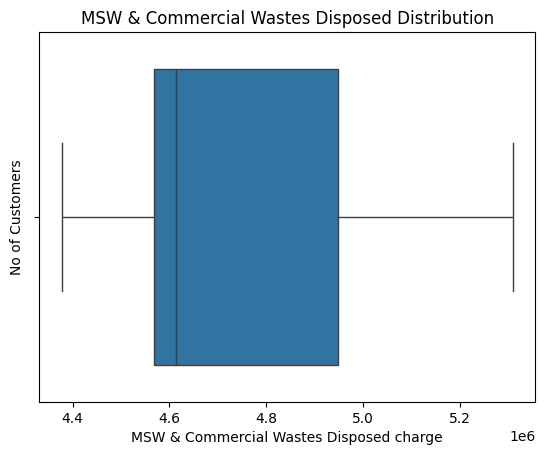

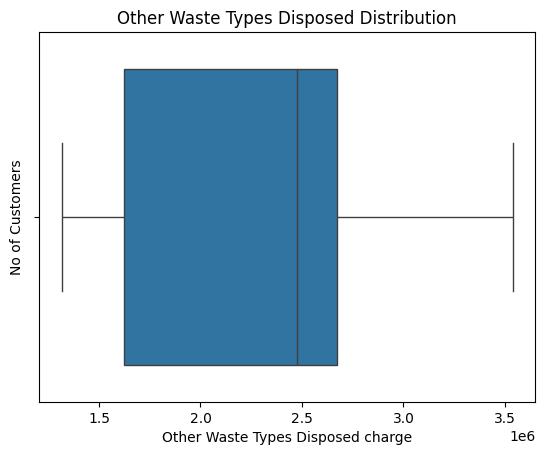

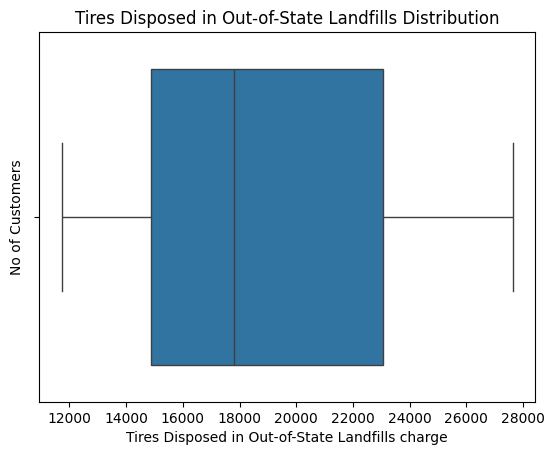

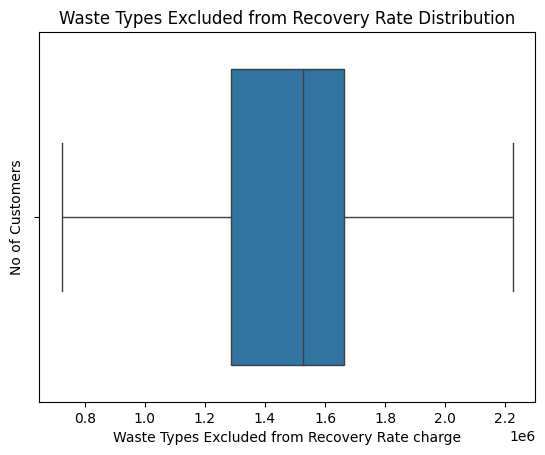

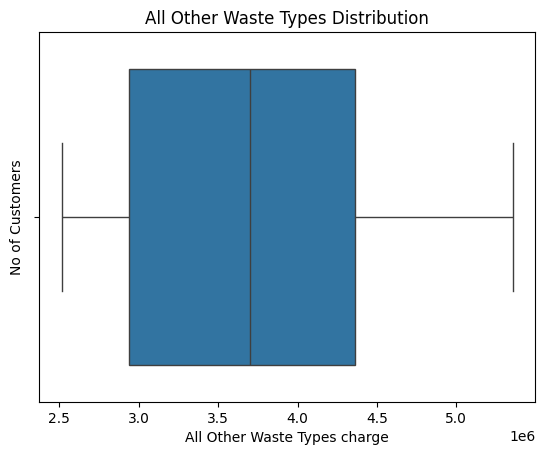

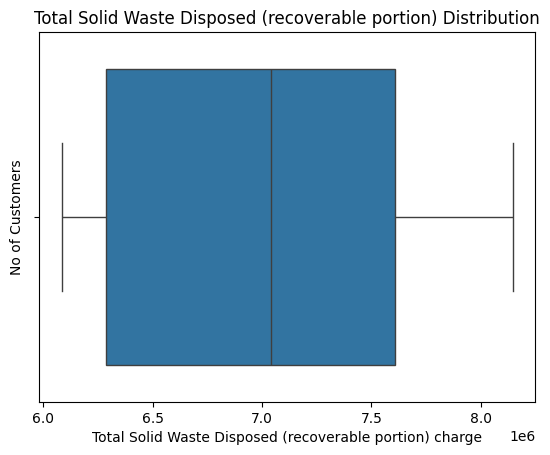

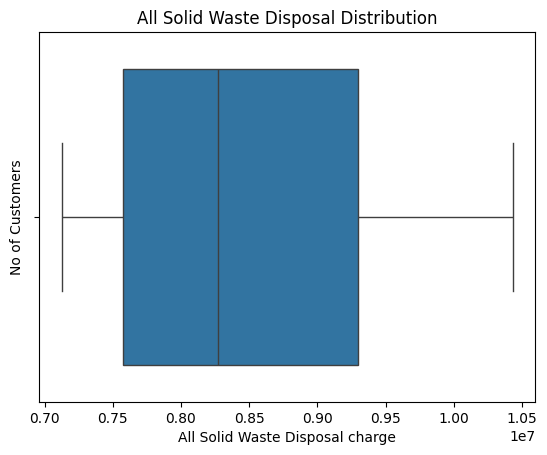

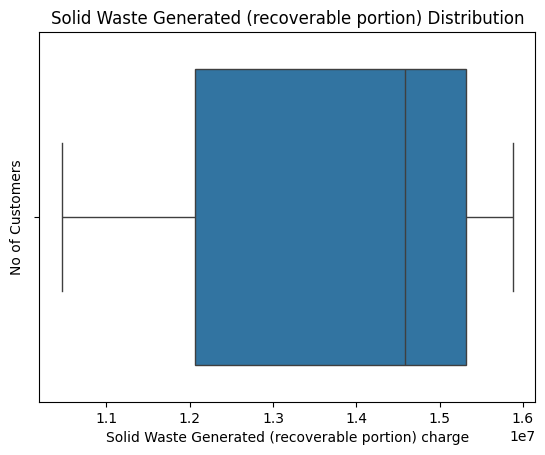

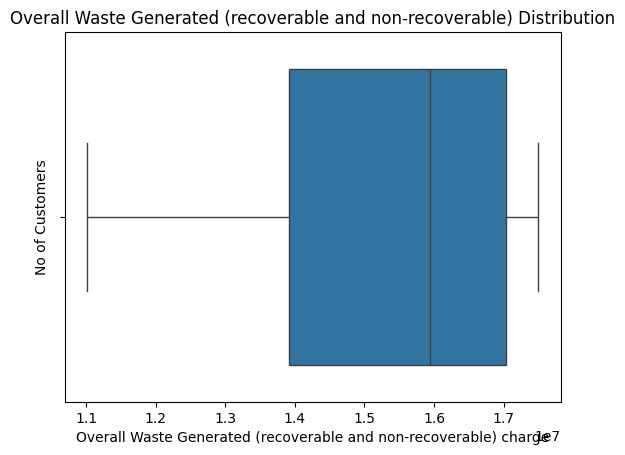

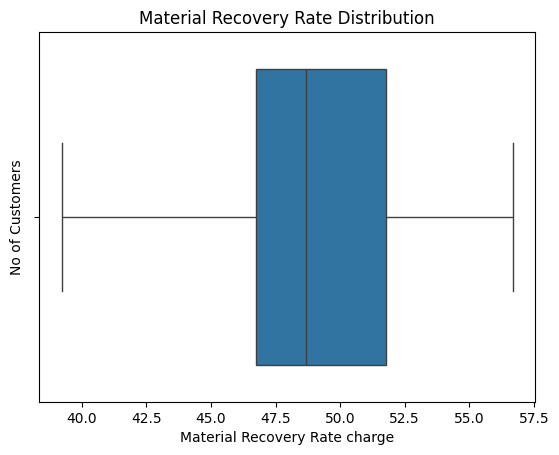

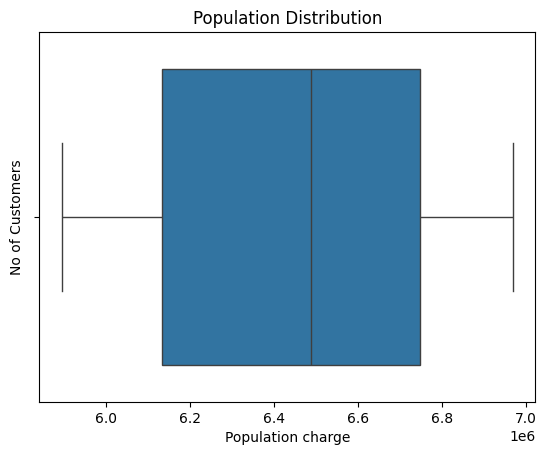

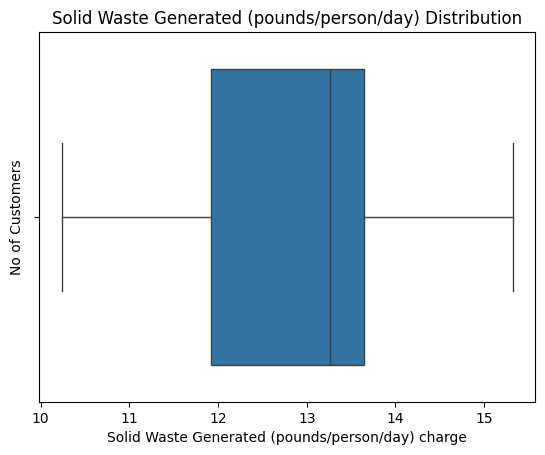

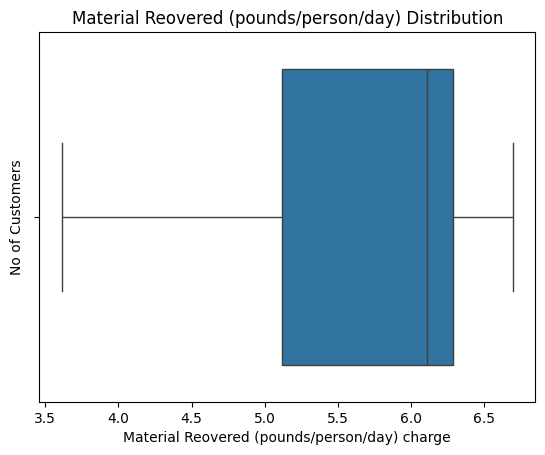

In [18]:
for i in num:
    ax = sns.boxplot(data = df,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()